In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
import os
import pandas as pd
import glob
import random

In [ ]:
#빈 캔버스 만들기
def init() : 
  blank = np.zeros([512,512],dtype=np.uint8)
  blank.fill(255)
  blank = cv2.resize(blank,(512,512))
  
  return blank

In [ ]:
def drawNp(img):
  blank = init()
  #print(img.shape[0])
  for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
      if img[i][j] == 1 :
        blank[i][j] = 0

  return blank

In [ ]:
def coorMaxMin(file):
  minX, minY = (file.loc[0][0],file.loc[0][1])
  maxX, maxY = (file.loc[0][0],file.loc[0][1])
  for i in range(0,file.shape[0]):
    x = file.loc[i][0]
    y = file.loc[i][1]
    if x > maxX :
      maxX = x
    if x < minX :
      minX = x
    if y > maxY :
      maxY = y
    if y < minY :
      minY = y

  return minX, minY, maxX, maxY

In [ ]:
def map2Image(minX,minY,maxX,maxY,csv_file):

  inputImage = np.zeros([512,512], dtype=np.uint8)

  for i in range(0,csv_file.shape[0]):
    x = csv_file.loc[i][0]
    y = csv_file.loc[i][1]

    mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
    mapY = int(round(np.interp(y,[minY,maxY],[0,500])))
    inputImage[mapX][mapY] = 1

  outputImage = drawNp(inputImage)

  rotImage = np.rot90(outputImage)

  return rotImage

In [28]:
def map2Image_noise(minX,minY,maxX,maxY,csv_file,fileName):

  inputImage = np.zeros([512,512], dtype=np.uint8)

  randomList = set()
  while len(randomList) < int(csv_file.shape[0]/7):
    randomList.add(random.randint(0,csv_file.shape[0]))
  print(fileName)
  newName = fileName+"_noise.csv"
  print(newName)

  data = {"lat":[],"long":[],"num":[],"Noise":[]}

  randomList=list(randomList)
  dicisionList = [1,-1]
  for i in range(0,csv_file.shape[0]):

    try:
      randomList.index(i)
      
      r = random.uniform((minX-maxX)/40,(minX-maxX)/20)
      D = random.choice(dicisionList)

      x = csv_file.loc[i][0]-(D*r)
      y = csv_file.loc[i][1]-(D*r)

      mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
      mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
      inputImage[mapX][mapY] = 1
      data["lat"].append(x)
      data["long"].append(y)
      data["num"].append(i)
      data["Noise"].append(True)

    except:
      x = csv_file.loc[i][0]
      y = csv_file.loc[i][1]

      mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
      mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
      inputImage[mapX][mapY] = 1
      data["lat"].append(x)
      data["long"].append(y)
      data["num"].append(i)
      data["Noise"].append(False)


  outputImage = drawNp(inputImage)

  rotImage = np.rot90(outputImage)
  print(data)

  dataFrame = pd.DataFrame(data)

  print(dataFrame)

  dataFrame.to_csv(newName,index=False)

  return rotImage

-0.1376182499999956
20160401052724_25_DT6102
20160401052724_25_DT6102_noise.csv
{'lat': [37.44423466667705, 37.437698499999996, 37.43856885, 37.44145774, 37.44413952966085, 37.44655782091014, 37.4455688, 37.44735831, 37.445689811724414, 37.44419063837279, 37.44230811111054, 37.44061294422625, 37.438969, 37.437392873236426, 37.441984851722694, 37.43667728308901, 37.43704359794785, 37.43746954320356, 37.43792104252779, 37.43826061, 37.44382168315511, 37.4371884196068, 37.44281269381512, 37.43584241926923, 37.4313087038265, 37.433900046997856, 37.427001471172304, 37.433073671580296, 37.433150345972095, 37.433227020285344, 37.42789278249048, 37.433380368676254, 37.43350815876201, 37.43361039067352, 37.433627429311855, 37.43374669967167, 37.43370410313641, 37.4335592747352, 37.43333777193253, 37.43779219274839, 37.4330071105304, 37.432890504659724, 37.432715856713365, 37.43028778207545, 37.42863494235704, 37.42693094568111, 37.42499686246218, 37.4229434418985, 37.4208303196227, 37.423951341

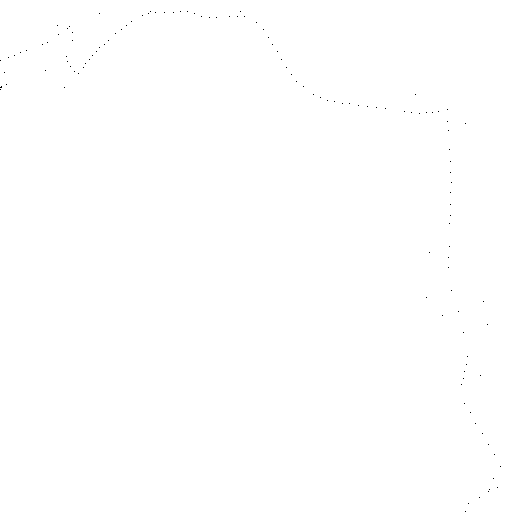

-0.05443072999999998
20160401054248_31_OA4712
20160401054248_31_OA4712_noise.csv
{'lat': [37.43472312, 37.43469056, 37.43470937, 37.43483086, 37.43731441, 37.43937774819057, 37.44131997829858, 37.44443465, 37.44677158292699, 37.445600407844246, 37.450025320135204, 37.45211768, 37.45363663236775, 37.45743319975535, 37.46055901453329, 37.46126751109125, 37.46328958, 37.46631545, 37.46891464174489, 37.47065415, 37.47378924, 37.474841055722884, 37.47584567, 37.48020358922752, 37.48019669, 37.482401660286826, 37.4843232, 37.48621864, 37.487141940279606, 37.487501382162094, 37.4878986491208, 37.48912129], 'long': [126.61571236999998, 126.61563443, 126.61561430999996, 126.61561736, 126.61704237999993, 126.61859035491943, 126.61972761154176, 126.62168796000003, 126.62296772003174, 126.62137211328493, 126.62507057189941, 126.62643422999996, 126.627516746521, 126.63048931902439, 126.63287640453333, 126.63208723068236, 126.63297852999996, 126.63472315, 126.63631439208984, 126.63722736, 126.638263

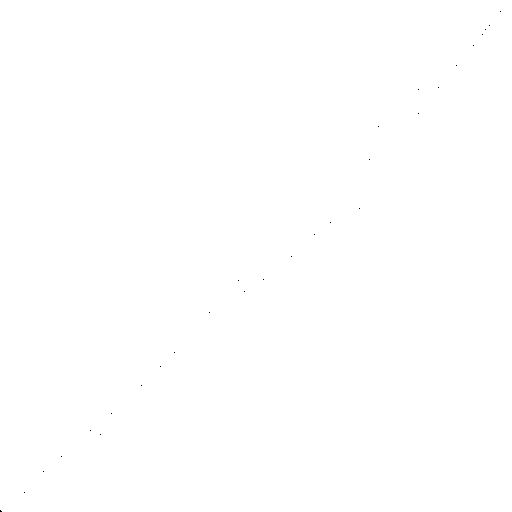

-0.3439572799999979
20160401053232_26_SI5229
20160401053232_26_SI5229_noise.csv
{'lat': [37.45815423, 37.45816986, 37.45805885, 37.45747316, 37.45424985675003, 37.44044864221469, 37.45120071919875, 37.449412061118025, 37.44825343, 37.446635297652406, 37.445030059344184, 37.44319182, 37.442069597488604, 37.441217756918114, 37.439684419453776, 37.43775918459271, 37.4537764587802, 37.43692433284183, 37.437452505439865, 37.43811976, 37.438134012961655, 37.43752065647135, 37.436992484354256, 37.45201565450978, 37.43556128956044, 37.434317490905215, 37.433499639429726, 37.43315886534413, 37.44794039540424, 37.43324405901096, 37.43346556209101, 37.433499639429726, 37.44220284787, 37.43363594862957, 37.433670025890756, 37.43368706451553, 37.43382337337403, 37.43373818036655, 37.43361890999318, 37.43343148473673, 37.43329517516453, 37.43302255527546, 37.43300551649942, 37.43276697322766, 37.431591284567375, 37.43022814416355, 37.42840490507033, 37.4263771384106, 37.424127786773354, 37.421997656

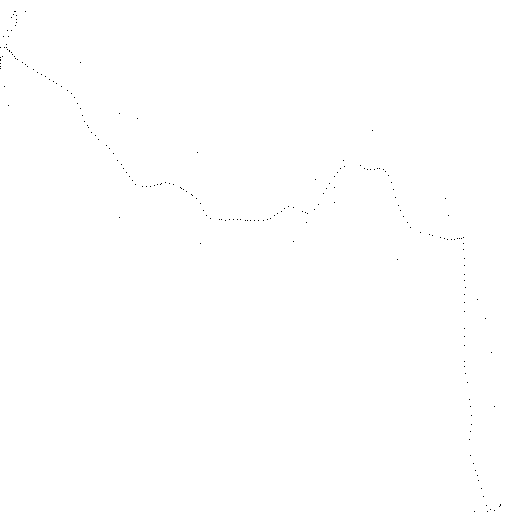

-0.7478761573839989
20160401054914_32_OA9583
20160401054914_32_OA9583_noise.csv
{'lat': [37.5165170390992, 37.4832721185899, 37.5144466598987, 37.51358957763611, 37.51292577841547, 37.51197262049156, 37.51070454546029, 37.509028043846506, 37.508707747220605, 37.542076102563215, 37.505708708459636, 37.50518101795249, 37.5041280166982, 37.502278653491175, 37.50171146073475, 37.50122322025861, 37.5004049544879, 37.52661682248247, 37.478103087655875, 37.497960408659395, 37.47713310486834, 37.50002307240708, 37.52149904917456, 37.50416032934321, 37.48540203396761, 37.50483205927796, 37.50448309897229, 37.503230790602395, 37.5017761318539, 37.49883141715704, 37.49598839139937, 37.493673032974414, 37.4913746282527, 37.4889983141779, 37.48640302203087, 37.52149555455677, 37.45141320015422, 37.479832292561206, 37.47731025619389, 37.44835881772887, 37.473921470561145, 37.49699229269748, 37.470079166736205, 37.467364841047726, 37.4654732852499, 37.487219232213825, 37.43024842802189, 37.4590873394

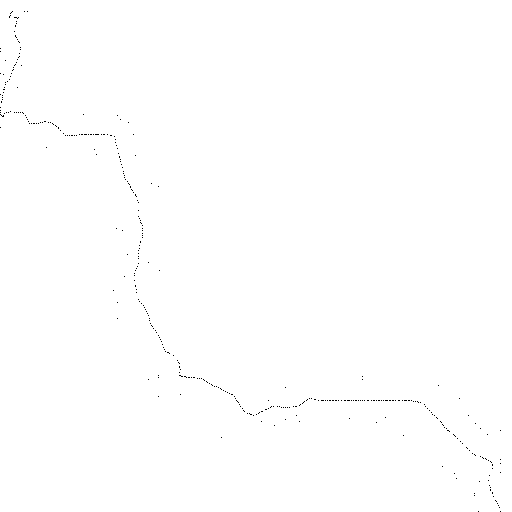

-0.14241775076989427
20160401060711_37_OA7455
20160401060711_37_OA7455_noise.csv
{'lat': [37.3079065005093, 37.3071434703281, 37.306906637307, 37.30760603662759, 37.3098929781464, 37.3115137775902, 37.30635059856032, 37.312593607224706, 37.30785211078738, 37.312593607224706, 37.312934118555106, 37.316198922452735, 37.32412938446304, 37.318780019411, 37.32528744696595, 37.3225476966436, 37.32512356127904, 37.32139958593899, 37.3288425669987, 37.33554893802238, 37.3325208518939, 37.33587267495877, 37.33759580251771, 37.33924212013881, 37.3410908647051, 37.342651809138346, 37.34332790276624, 37.34317570328761, 37.34528121161338, 37.34659466297539, 37.3465811522297, 37.348027557336394, 37.349452906497504, 37.35161820224435, 37.35223226208701, 37.352215204937, 37.35125146966488, 37.35197741543107, 37.34538109483448, 37.353008358313254, 37.353613878368016, 37.3542790919526, 37.35496135617204, 37.355686255110406, 37.35630880978718, 37.3569860314524, 37.35778415847107, 37.358483446560534, 37.3

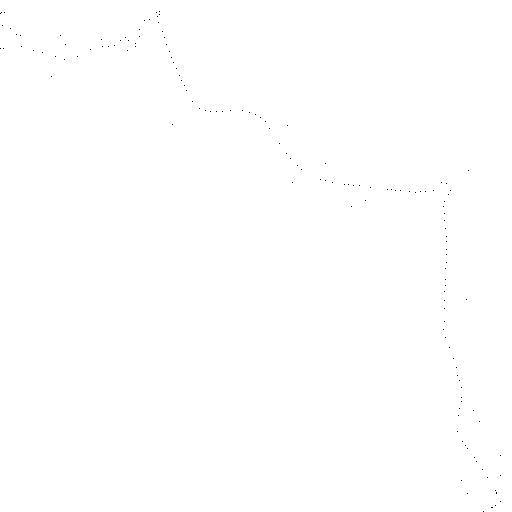

-0.6807409546098171
20160331170256_7_DT6143
20160331170256_7_DT6143_noise.csv
{'lat': [37.43765268, 37.439701456709315, 37.44135405206107, 37.44339556, 37.446635297652406, 37.469220367732234, 37.44908839460982, 37.44828846, 37.44809576, 37.44689436, 37.423977510374066, 37.44389250372765, 37.469550924838416, 37.44162664160217, 37.439701456709315, 37.43791252369782, 37.41181708172104, 37.43673308, 37.437384354346364, 37.437963636663056, 37.43815105057021, 37.43791252369782, 37.43753769421952, 37.43698485, 37.43649838448306, 37.435867976463115, 37.43487975861071, 37.43404487473968, 37.433175904085225, 37.452219220833584, 37.43310774909745, 37.433192942822494, 37.4332848, 37.43348260076232, 37.433567794060686, 37.433670025890756, 37.43372114175342, 37.433789296182674, 37.433789296182674, 37.41355848583657, 37.43342159, 37.433278136450575, 37.43310774909745, 37.432920322561046, 37.432715856713365, 37.40257614123328, 37.405455862929166, 37.42779146885008, 37.4270383, 37.42440043905578, 37.42

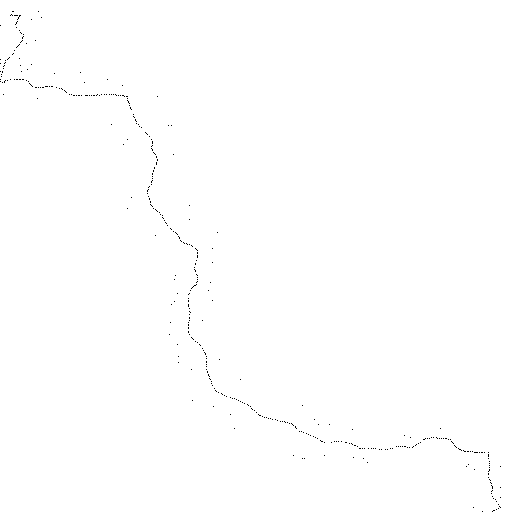

-0.1532230103562
20160401060546_36_DT6111
20160401060546_36_DT6111_noise.csv
{'lat': [37.34588852, 37.34651790000574, 37.3471535, 37.34177959844791, 37.347370817482044, 37.34254937610255, 37.3481554930031, 37.349486011014, 37.34403266654221, 37.352931601901176, 37.35521720365556, 37.35771968, 37.3659555350464, 37.36261934653864, 37.36476821901685, 37.36657595296429, 37.36831542941734, 37.37015718405753, 37.366885416530934, 37.37380645321355, 37.37534317, 37.378205803359755, 37.379876806721676, 37.381274964598056, 37.38274129729185, 37.38502599108882, 37.38430990052315, 37.384037102318324, 37.383696103166606, 37.382843598502795, 37.38263899594129, 37.38194463, 37.38147957088128, 37.38107035775658, 37.38038833091982, 37.379979111840456, 37.380149620061545, 37.380592939622154, 37.38158187381352, 37.382434392821544, 37.3834294, 37.38512828918276, 37.385810272909076, 37.3868332368677, 37.3875152050862, 37.38679913829396, 37.385435182627226, 37.37648270831181, 37.376520256392595, 37.37994501

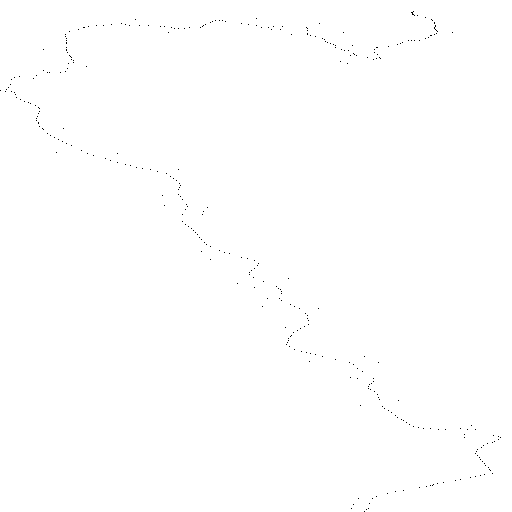

-0.2373076182837366
20160401053706_30_SI5216
20160401053706_30_SI5216_noise.csv
{'lat': [37.563256008950425, 37.57806995654701, 37.569897387251345, 37.56954447938757, 37.56949345642553, 37.56976048, 37.56436357247879, 37.57180646224733, 37.571844728283736, 37.571632138943826, 37.57157419, 37.57069664, 37.57663679004561, 37.57124494304439, 37.563978518568454, 37.56271513, 37.56197177, 37.56146013, 37.56057376, 37.56001454, 37.55819955, 37.55810197, 37.55645659, 37.55391898, 37.562595607569065, 37.55224143999387, 37.55212001, 37.55104211265072, 37.54970666871614, 37.548260619639976, 37.546908113055686, 37.545615127842865, 37.54410094559767, 37.543148185949214, 37.543607553728364, 37.54354800621294, 37.54242387, 37.54057056980072, 37.539685822923076, 37.53818853505983, 37.536682709556395, 37.53490460526244, 37.53317322146972, 37.53123191, 37.52945092050476, 37.522208413804584, 37.52835337183263, 37.5265750259974, 37.52525616155327, 37.52393688, 37.52818663702502, 37.532533550417845, 37.52

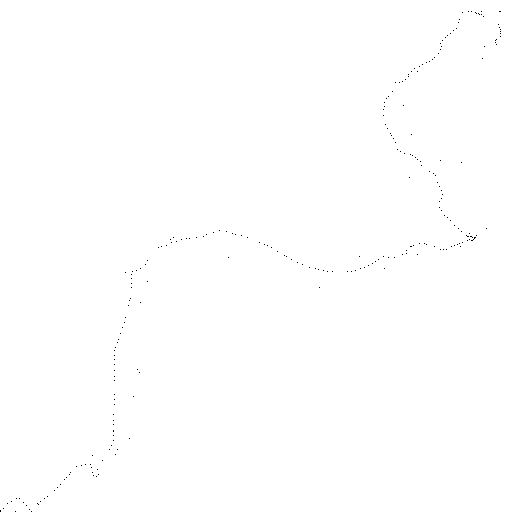

-0.14116788045109274
20160401051324_22_OA7455
20160401051324_22_OA7455_noise.csv
{'lat': [37.4477710498268, 37.4475754776163, 37.4477279330447, 37.45213492923794, 37.446888553228504, 37.446675191005895, 37.4470224955962, 37.448498328845794, 37.447403747188, 37.4457767932806, 37.44483801236885, 37.44407990278613, 37.443228085101865, 37.442422020920894, 37.441277386073686, 37.4403829437506, 37.439428860155054, 37.438517358215364, 37.43761899639185, 37.4370716367695, 37.4370716367695, 37.43675395378924, 37.436907294954025, 37.437290646491434, 37.43766547720713, 37.438023268411705, 37.44251664154149, 37.438321426442144, 37.43805734367531, 37.437682514922315, 37.43717990069344, 37.436756304994546, 37.43625985234324, 37.4356106392456, 37.4345767420704, 37.433278136450575, 37.43301403588792, 37.43309071034082, 37.43322485960721, 37.433235539648656, 37.42942766708905, 37.43341444605379, 37.4334485234158, 37.433588671188296, 37.433601871352906, 37.43364446794633, 37.43888292552437, 37.433763738

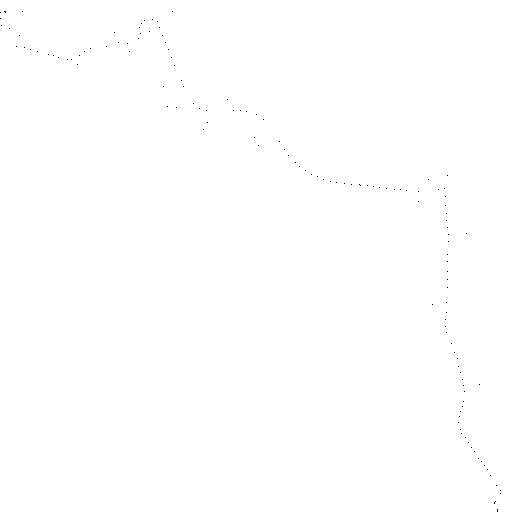

-0.10833894142056266
20160401061211_39_YT6158
20160401061211_39_YT6158_noise.csv
{'lat': [37.522775200000005, 37.523354499999996, 37.527543114917876, 37.52823501160868, 37.5237529, 37.52389015, 37.52390668, 37.52440262, 37.52440262, 37.52949620989874, 37.525460374347695, 37.5257752013105, 37.52601017, 37.53065698152708, 37.52705975, 37.52748545430024, 37.527893867124796, 37.52392691754246, 37.52875583219989, 37.52906804153961, 37.52943390370358, 37.52985081421446, 37.53036131370717, 37.53092694, 37.53126318760534, 37.53163754715267, 37.531714120464976, 37.53133646, 37.53040385517385, 37.52986783092054, 37.53031026391513, 37.527440788776445, 37.53369274, 37.53449608, 37.536427481881034, 37.53821405726392, 37.53960075055465, 37.5411745736582, 37.54336085656919, 37.54127951572357, 37.54654233661899, 37.54575973914503, 37.5439563310777, 37.54293551472254, 37.54248502903432, 37.54224645578105, 37.54303759698704, 37.54388876, 37.54365859441798, 37.53783515566953, 37.5421018376638, 37.5412397

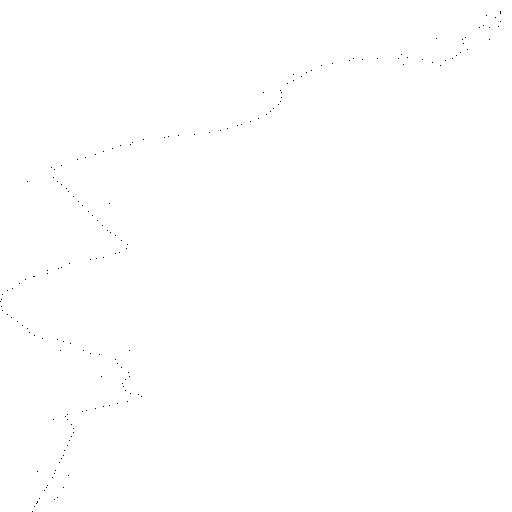

-0.4853314215628046
20160404092213_81_DT6111
20160404092213_81_DT6111_noise.csv
{'lat': [37.44756515, 37.46777145020779, 37.4463782, 37.44730923105054, 37.44861557, 37.449103867687576, 37.43594710912613, 37.44743597008531, 37.44637976209339, 37.445255395264844, 37.44368806785583, 37.44213634, 37.440277111649436, 37.439326636191204, 37.4382021633725, 37.43687321916678, 37.43670283999782, 37.43749643593306, 37.43818346963422, 37.43786141069771, 37.43697544648197, 37.416380242112346, 37.43581086464924, 37.434889471189386, 37.43370410313641, 37.43288624495856, 37.433192942822494, 37.43321663159901, 37.43329517516453, 37.43353371675297, 37.43346556209101, 37.4470228439594, 37.4336359486296, 37.4511376925232, 37.45093748081245, 37.43332925258087, 37.43317902139357, 37.43305663281589, 37.43274993439342, 37.432679903837894, 37.43073932472393, 37.42872866104895, 37.4254910382569, 37.42221919299645, 37.42017421710704, 37.41734661736673, 37.39233460213694, 37.41114157225685, 37.38698960737574, 37

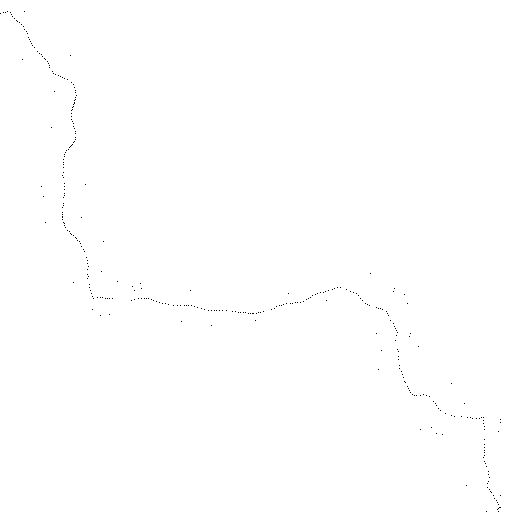

-0.33251576390340887
20160401170726_4_DT6143
20160401170726_4_DT6143_noise.csv
{'lat': [37.43757096, 37.43965034493103, 37.44109591, 37.44329623087351, 37.444897638639404, 37.44665666, 37.44706315, 37.447953063454214, 37.44878759751491, 37.45124062389575, 37.45120559927596, 37.45083945, 37.43377302747345, 37.44849216316561, 37.44753106, 37.44588572420444, 37.431700857403854, 37.44334903, 37.44162565, 37.440161461142935, 37.43886662662579, 37.43784437302323, 37.43670283999782, 37.436634688221616, 37.437009522222674, 37.43779325997655, 37.43816928, 37.437622882902154, 37.43728212758971, 37.43680506754575, 37.43622577626121, 37.43525187, 37.43438564479146, 37.43356431, 37.43300551649942, 37.43308461, 37.43314457, 37.433231875125244, 37.433408899999996, 37.43349864, 37.43341444605379, 37.43354409, 37.43368706451553, 37.43370410313641, 37.433650799999995, 37.43384635, 37.43373818036655, 37.43348260076232, 37.433219799999996, 37.43314182659911, 37.43292752, 37.43283954, 37.43154495, 37.42845

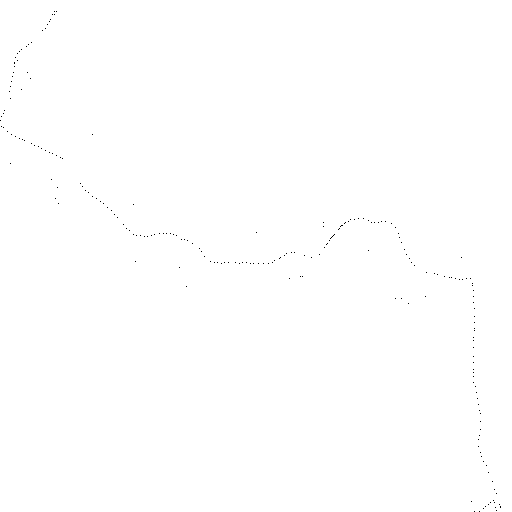

-0.12005588877782003
20160404084948_71_OA4178
20160404084948_71_OA4178_noise.csv
{'lat': [37.431561417175104, 37.431540167250205, 37.42784237468145, 37.4272836914483, 37.43101195292881, 37.43405769357351, 37.430091828757895, 37.4296468648727, 37.42918873292581, 37.42866050201192, 37.42849248978683, 37.428796820023926, 37.42969992058397, 37.431148266658894, 37.43252842919564, 37.43375521897582, 37.4352619387371, 37.437136886493114, 37.435527213160356, 37.43091907653434, 37.432477312518465, 37.431148266658894, 37.42942728760067, 37.42356330198251, 37.4263771384106, 37.42450268340574, 37.42266226374488, 37.4207743581148, 37.4175087245954, 37.41197707744173, 37.4137151348702, 37.41074956489381, 37.404669517380846, 37.407715699409565, 37.405874867205156, 37.404051035140455, 37.402621017472796, 37.40091462198461, 37.404111419718795, 37.397883016326205, 37.395695434097796, 37.39407883199609, 37.39271500877053, 37.39072380037681, 37.38903256211633, 37.387507859774296, 37.38480434473974, 37.383

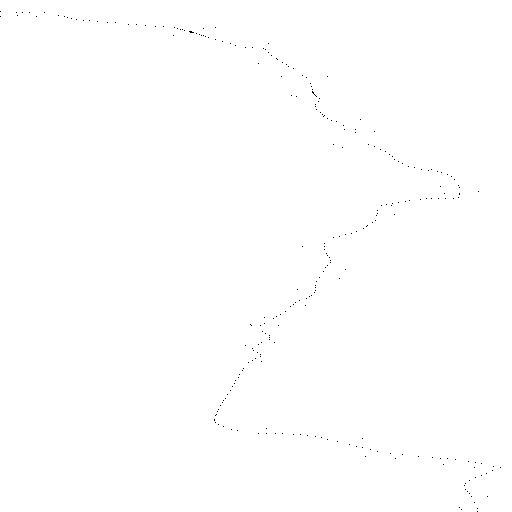

-0.04176951000000173
20160404093615_87_YT6149
20160404093615_87_YT6149_noise.csv
{'lat': [37.47031951, 37.46832926365695, 37.469170463987716, 37.467652124205635, 37.468261215419936, 37.46784315091687, 37.46559827534631, 37.46713342038787, 37.466855609782094, 37.46650786, 37.46606849749389, 37.46553834, 37.46380528704236, 37.46327730048417, 37.46267918, 37.46108516, 37.457157781588386, 37.45918226, 37.45781905, 37.45781905, 37.45565931, 37.45377806, 37.45079188683668, 37.44895211355582, 37.4475739, 37.44663336, 37.44501689103797, 37.44435248239694, 37.44247847751788, 37.44084294399492, 37.439731412822994, 37.4368425417831, 37.43779419, 37.43675395378924, 37.43670283999782, 37.43715186, 37.43782733534489, 37.438134012961655, 37.43816286, 37.43753769421952, 37.43695840860581, 37.43625985234324, 37.435390907404816, 37.434732254697245, 37.434283413938815, 37.43335428, 37.43311525, 37.43321315254634, 37.43327925, 37.43485568532057, 37.43343148473673, 37.43353748, 37.43362501, 37.435271766234

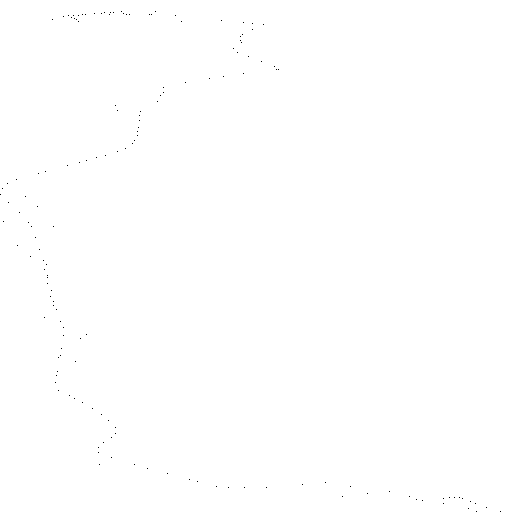

-0.15803577999999874
20160404091601_75_DS4601
20160404091601_75_DS4601_noise.csv
{'lat': [37.31484212, 37.31440152, 37.31259805112399, 37.3158770601487, 37.30942368027706, 37.315515127799465, 37.30536165544227, 37.303654856848006, 37.30169178393113, 37.299626658574475, 37.29761249, 37.29536904, 37.29266214586728, 37.29013564364953, 37.2868920366984, 37.28395559824408, 37.281258071248736, 37.278911189317654, 37.27681889231442, 37.278304520479715, 37.27727083097095, 37.267666528019404, 37.259339944353776, 37.268835669506096, 37.26062925, 37.257795754100776, 37.255438872828094, 37.25284280231728, 37.25064565, 37.24802617140195, 37.24645421793983, 37.238302199144705, 37.24383841, 37.24439716, 37.23767766295374, 37.241159378000546, 37.24005672, 37.237708663541056, 37.23485791, 37.23176349784072, 37.22868822817218, 37.225911100000005, 37.222810697248526, 37.22117037430663, 37.218961, 37.21583907837921, 37.212934047018216, 37.21040486981147, 37.20793367941885, 37.205961515379634, 37.203979011

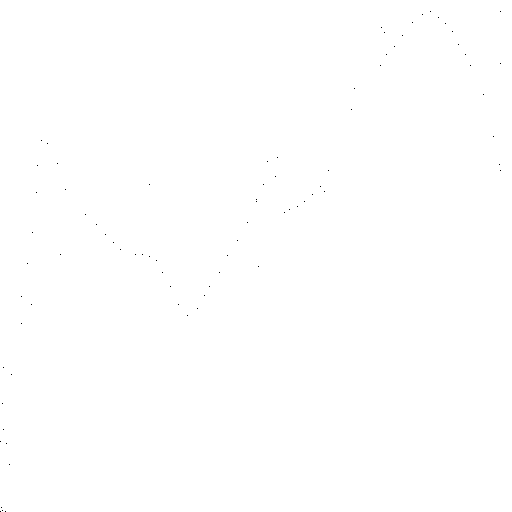

-0.33160431610310326
20160401170402_3_OA9649
20160401170402_3_OA9649_noise.csv
{'lat': [37.4501153, 37.44978683111485, 37.44993165, 37.44759861, 37.444948746833504, 37.45401489514458, 37.440314795325754, 37.437196938519186, 37.42107230458562, 37.43255379, 37.42990773, 37.42825154648651, 37.426104493326456, 37.42450268340574, 37.423906256062814, 37.423889215211744, 37.42358247922991, 37.42368757, 37.42399146025981, 37.42454965, 37.42521838994594, 37.425627362040096, 37.42620673534935, 37.42748319, 37.42871162129551, 37.429290970736695, 37.43044965616829, 37.43220468965056, 37.43346556209101, 37.43419822145497, 37.43540794563785, 37.44696155366703, 37.43838491, 37.439156262607774, 37.439701456709315, 37.44004220100574, 37.440314795325754, 37.44017849828988, 37.44004220100574, 37.428163435230424, 37.44004220100574, 37.42734015603908, 37.439939977879725, 37.43949700938672, 37.43884958918017, 37.43763088, 37.436396156516224, 37.43506718024053, 37.43394264342158, 37.43261295, 37.431080109824

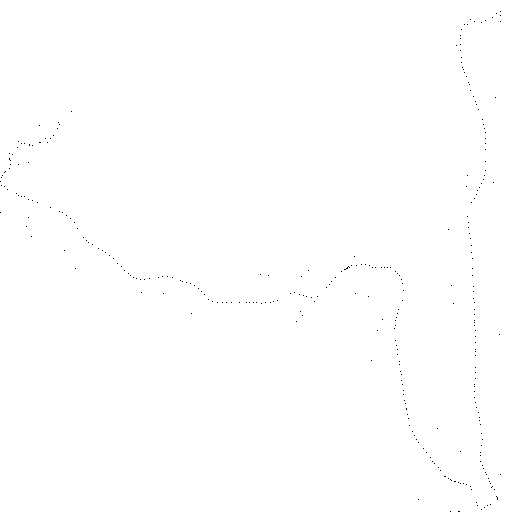

-0.09570609999999391
20160401061303_40_OA2093
20160401061303_40_OA2093_noise.csv
{'lat': [37.463879999999996, 37.46238312119617, 37.46133564042982, 37.45875519838315, 37.46196445395434, 37.458589724661955, 37.45354260730925, 37.45233367185617, 37.446038597574145, 37.448466610283226, 37.44689079316747, 37.445982120746045, 37.44696521628548, 37.44352622239447, 37.4426999532675, 37.44149886537843, 37.440419863303646, 37.43848328316121, 37.43726508978335, 37.43675672, 37.432655060463, 37.43753769421952, 37.438023268411705, 37.438099937732986, 37.43749509984182, 37.436830624410895, 37.43635841839638, 37.43568907592263, 37.43509327, 37.4338404119639, 37.43316738471517, 37.43303959404761, 37.43309922971964, 37.43314695019858, 37.43331221387465, 37.43598262454972, 37.43351274, 37.43353371675297, 37.429689512015955, 37.433661506576904, 37.433670025890756, 37.43376373827898, 37.433602112590606, 37.43598114194432, 37.43334714, 37.433073671580296, 37.43295440014804, 37.43283512852571, 37.432784012

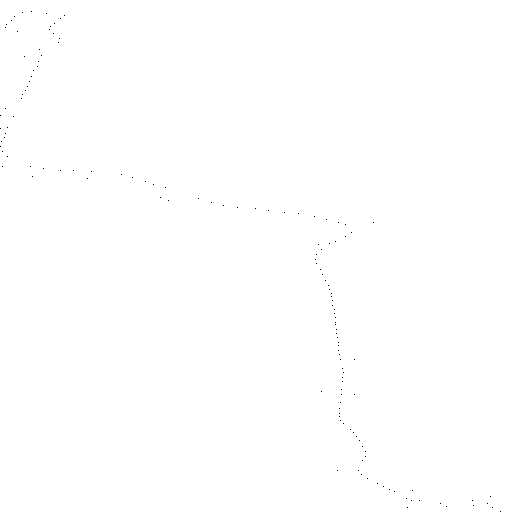

-0.47176454972478155
20160404092249_82_OA9583
20160404092249_82_OA9583_noise.csv
{'lat': [37.34730537116621, 37.3473026261036, 37.3473685158437, 37.34730258444047, 37.348246520003535, 37.36658364589719, 37.365410302590426, 37.3539579856667, 37.35678638247769, 37.3594470889837, 37.3617884992689, 37.364427132256, 37.367086044632295, 37.36961148369258, 37.372305840659024, 37.3749695480194, 37.37694400063987, 37.37912656491981, 37.38153888910121, 37.38335510246417, 37.38451449852546, 37.38714012333367, 37.39010662774293, 37.3931379691698, 37.39532329903697, 37.39737123059197, 37.3989910673449, 37.400246109831244, 37.38429752486876, 37.403778308773134, 37.41798716918787, 37.4075678736081, 37.409982588033046, 37.412061929307924, 37.414345729440285, 37.415865854379, 37.43970821371947, 37.419010179008296, 37.420821798847655, 37.422529981878, 37.410337272353544, 37.42664978250189, 37.428490104147855, 37.446499059694176, 37.45559282106336, 37.43390856628458, 37.4337773788449, 37.43370410313641, 

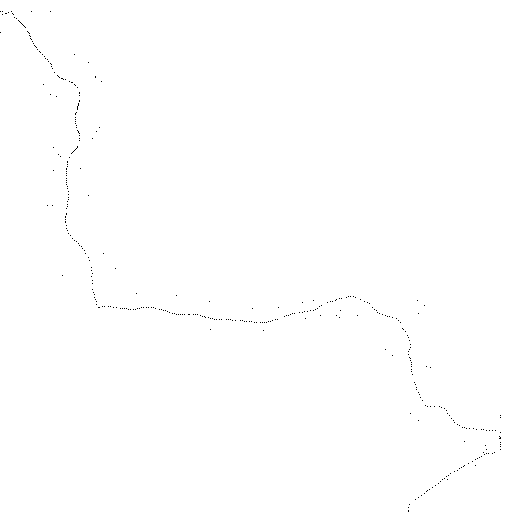

-0.3324576850741181
20160404095410_92_OA8932
20160404095410_92_OA8932_noise.csv
{'lat': [37.78439089, 37.78187463362188, 37.78048397870303, 37.7785317, 37.77673238, 37.77434443331179, 37.785536709961406, 37.77285123449893, 37.7839502063693, 37.771494968303685, 37.77081650806833, 37.77023859, 37.767294392575685, 37.765049344727814, 37.76359052037918, 37.76063885753123, 37.75777917, 37.754769109015825, 37.75358153099765, 37.742881444512534, 37.7515676, 37.73300309661017, 37.74791211, 37.73026624598695, 37.757660428660664, 37.74172855, 37.7393969832009, 37.73783573695442, 37.73596535260653, 37.733674309120396, 37.73128586, 37.742880691801474, 37.727246333721354, 37.72554432, 37.72415744297928, 37.72147577402671, 37.71964983955276, 37.71784348533014, 37.71689049863461, 37.715297382412594, 37.71421454386711, 37.714516559987004, 37.71382777, 37.71088393008269, 37.70942403799441, 37.706754, 37.71270085607462, 37.7006640815145, 37.69879651505451, 37.69646107, 37.69407645557528, 37.692106845502

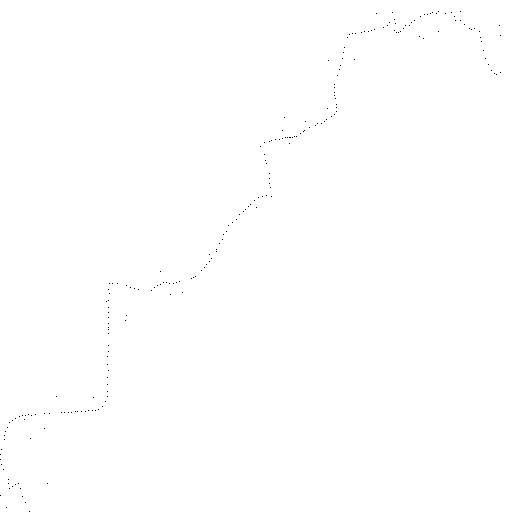

-0.06643191799719972
20160404095843_96_DS4617
20160404095843_96_DS4617_noise.csv
{'lat': [37.4538360086667, 37.4508338238308, 37.4494788902053, 37.44826670262349, 37.447193470814206, 37.4464229156713, 37.44520428728022, 37.443705104199815, 37.442155922544295, 37.44301588418909, 37.4395097533375, 37.441134152471896, 37.43736731656328, 37.4366517261715, 37.437231014159046, 37.437929561356775, 37.438219401748704, 37.43808290011281, 37.437401392125565, 37.437060635804635, 37.4365041907678, 37.43608947177793, 37.43852959707167, 37.4348301793581, 37.432269634975015, 37.433882489984995, 37.43343948563714, 37.43303959404761, 37.43320998155587, 37.4333251904123, 37.43339740736696, 37.436524048854686, 37.433641172940895, 37.43601490091971, 37.433766506782604, 37.4338713421014, 37.4338063347803, 37.4338263916579, 37.43339740736696, 37.4333145975763, 37.433073671580296, 37.432978062614396, 37.43285216734055, 37.43274993439342, 37.432613623580046, 37.4325174190139, 37.43244323471426, 37.43237507905

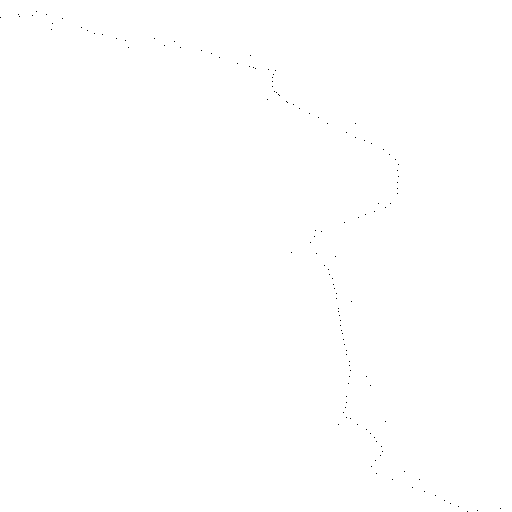

-0.11334479422509958
20160404101739_101_SI6310
20160404101739_101_SI6310_noise.csv
{'lat': [37.24446582535012, 37.24083116534556, 37.24073294131935, 37.23993870769996, 37.23996078109709, 37.244322737877624, 37.234780649182014, 37.240006413609464, 37.240022374969314, 37.2400159689897, 37.24010229732296, 37.24546735018863, 37.24297938978806, 37.24014927179489, 37.24024290963822, 37.240527328258906, 37.24054441075407, 37.240749400393724, 37.240715235492495, 37.240937307073686, 37.24133020134524, 37.24221847649662, 37.243653360395776, 37.24515654279894, 37.24667056, 37.24730346, 37.2501198, 37.25161305348295, 37.255932753511274, 37.25190341265676, 37.25186925281205, 37.251937572486, 37.25188633273636, 37.251595973496705, 37.2512549, 37.25051992655728, 37.24976839259619, 37.24937554231508, 37.24857275493662, 37.2482140599392, 37.24783828239622, 37.24770351, 37.246830506097496, 37.24599352909625, 37.24486615762577, 37.24426830227549, 37.24418289398112, 37.24428746, 37.24380709633609, 37.2431

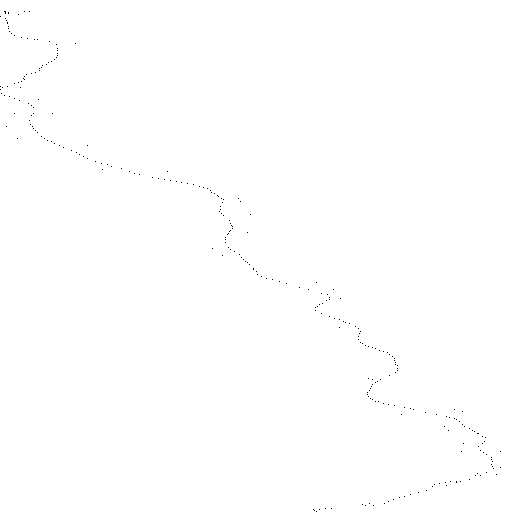

-0.26520455053007197
20160404101308_100_DS2616
20160404101308_100_DS2616_noise.csv
{'lat': [37.4572171, 37.462858511591165, 37.45401138119878, 37.453227813319735, 37.45210020559189, 37.45220575592355, 37.452655630948954, 37.4533981548613, 37.45401138119881, 37.45469273789926, 37.46782171306706, 37.457009304251244, 37.45905327379554, 37.4614378343213, 37.46429920657621, 37.460537909379866, 37.46985131889585, 37.472099296170796, 37.47431314710594, 37.47696968166888, 37.48013393180586, 37.482759237502655, 37.48497277265625, 37.48715218934692, 37.48970611236973, 37.50465224338734, 37.49501799256213, 37.49823273641939, 37.50162326525573, 37.50455118891613, 37.50741091047932, 37.510474776303454, 37.51381084273103, 37.52587484215063, 37.5298321281882, 37.521571726365984, 37.5235278, 37.52313742082534, 37.52320549375219, 37.534437598129806, 37.52327356661686, 37.523273566616886, 37.52334083940782, 37.52320549375215, 37.52347778483832, 37.52354585745459, 37.51518635292392, 37.523613930008715, 3

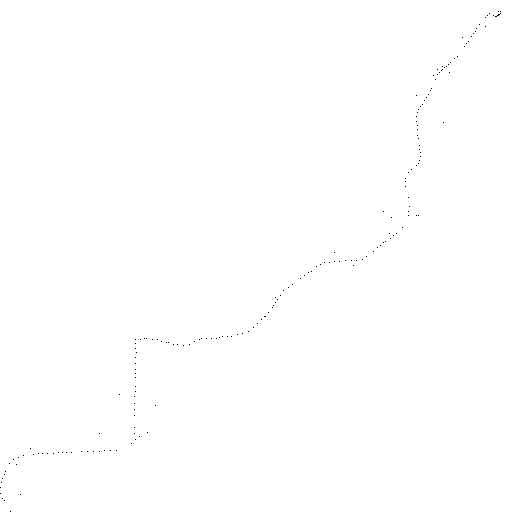

-0.2682536731476759
20160404100631_98_DT6143
20160404100631_98_DT6143_noise.csv
{'lat': [37.15254449, 37.15884480346017, 37.1503633079809, 37.149491054516616, 37.14104163252209, 37.13739099960588, 37.14759258572808, 37.134853110943666, 37.14554013342693, 37.144445469425065, 37.1430600125835, 37.14251266461592, 37.14226788, 37.128420599178725, 37.14777979040081, 37.140323233139284, 37.12854284207902, 37.14044296931116, 37.13977586536861, 37.13823952, 37.13623498442895, 37.13534546172318, 37.13425065019047, 37.133121609205645, 37.131735944972036, 37.13036736279805, 37.1409861567249, 37.11580051376778, 37.128160471908494, 37.12766434029039, 37.127014231867726, 37.12650128, 37.12586797446692, 37.125508696185896, 37.124636156117546, 37.11647307165842, 37.11611275199475, 37.12545737057796, 37.12415738, 37.13078301060322, 37.12176873, 37.11940070448258, 37.118886450186, 37.12925881874946, 37.1211458952603, 37.123164791260116, 37.12530424873489, 37.128194687762274, 37.13053843692339, 37.132745

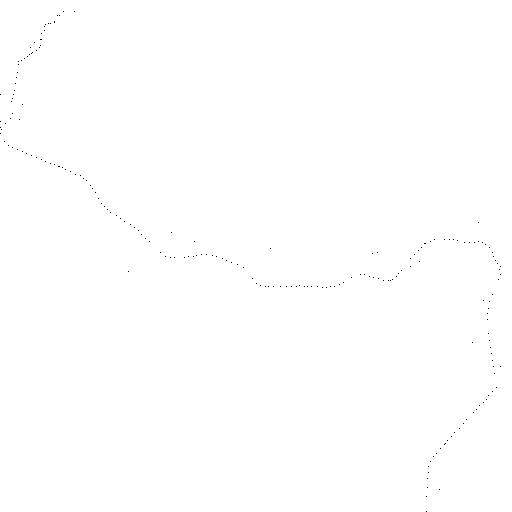

-0.5048528720563397
20160404105213_109_OA3424
20160404105213_109_OA3424_noise.csv
{'lat': [36.531329527943655, 36.53192945220082, 36.517137861057165, 36.53418829313436, 36.53446223243906, 36.53490380734642, 36.535191647083224, 36.536276759876976, 36.53747842906842, 36.52272680355447, 36.55777061221113, 36.55769629524361, 36.54598376727122, 36.548845329838755, 36.549638274214495, 36.552327329349325, 36.554188928095826, 36.57890306309476, 36.55998028185474, 36.56266897712083, 36.56573673306325, 36.56880436717623, 36.57145828940066, 36.57452569627056, 36.57742066514631, 36.57914380937464, 36.58265890435262, 36.58458869236354, 36.58796570529717, 36.590308851933315, 36.59220399202732, 36.59468483235606, 36.59754459099136, 36.598543758781275, 36.600817678619855, 36.601816804021134, 36.60381501600357, 36.60426288400214, 36.60557202170343, 36.606261032621774, 36.6080524322046, 36.63316601641553, 36.61118728135568, 36.612840776826744, 36.61377085244865, 36.614632023577656, 36.61604432340854, 36

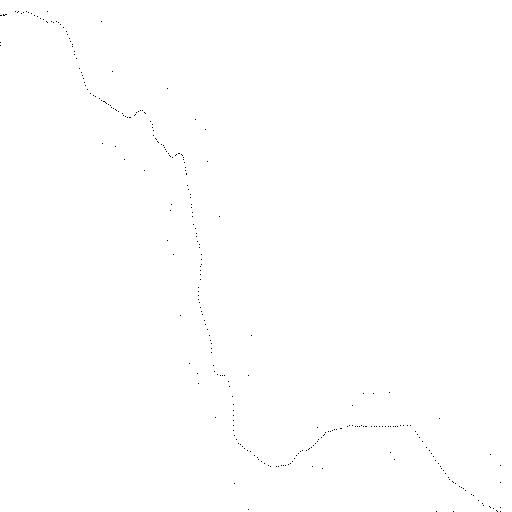

-0.4675043049944776
20160404104212_103_YT6127
20160404104212_103_YT6127_noise.csv
{'lat': [37.44644790499448, 37.44557684193183, 37.444224710828024, 37.443228085101865, 37.442261294181385, 37.46235995973748, 37.44017849828988, 37.4391392252281, 37.4382703137213, 37.437060635804635, 37.436719877932155, 37.43702656008719, 37.437622882902154, 37.438134012961655, 37.43811697534928, 37.437895486034996, 37.43717990069342, 37.436634688221616, 37.45915949598992, 37.435033103615496, 37.434249336956924, 37.43331221387465, 37.41618976387171, 37.433227020285344, 37.43323673307852, 37.43329517516453, 37.4332237, 37.433567794060686, 37.43352547, 37.4336267920288, 37.4338167, 37.43369443554646, 37.43368706451553, 37.4337674, 37.4335526, 37.433250726178386, 37.43309071034085, 37.4472740649093, 37.41320564836964, 37.43156830914259, 37.430227059905796, 37.42789370856917, 37.426070412621115, 37.424485642690456, 37.422594099185, 37.420566175145346, 37.41836777528496, 37.41603296988605, 37.413578425041905,

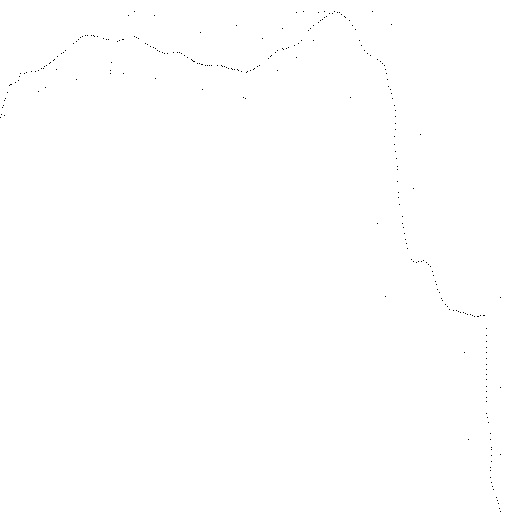

-0.36862467110705666
20160406110314_128_YT6158
20160406110314_128_YT6158_noise.csv
{'lat': [37.714109171107054, 37.7122862, 37.70983145263312, 37.70786226112981, 37.7061646402512, 37.70487442237716, 37.70378790569453, 37.70202228211617, 37.700935723625655, 37.69978123777874, 37.69801551876568, 37.69675911616781, 37.695757374516994, 37.68269530741864, 37.684179753485935, 37.69266717093429, 37.704919891392684, 37.68986550143679, 37.68823539047565, 37.686333549068536, 37.68490713600885, 37.6837524005829, 37.68266557434859, 37.6824425, 37.692165453357184, 37.68123909075034, 37.68052583866457, 37.665037322883904, 37.67943896515671, 37.67832501687118, 37.67729913640425, 37.67560081568809, 37.674242131125716, 37.67295135774715, 37.659497473491626, 37.67261167681042, 37.67308722968647, 37.67367631, 37.68879000881156, 37.67373261800065, 37.67394892, 37.67410626130112, 37.66271610187411, 37.674547837321406, 37.67451387002853, 37.67478560793617, 37.69133492111897, 37.674479902720094, 37.659579504

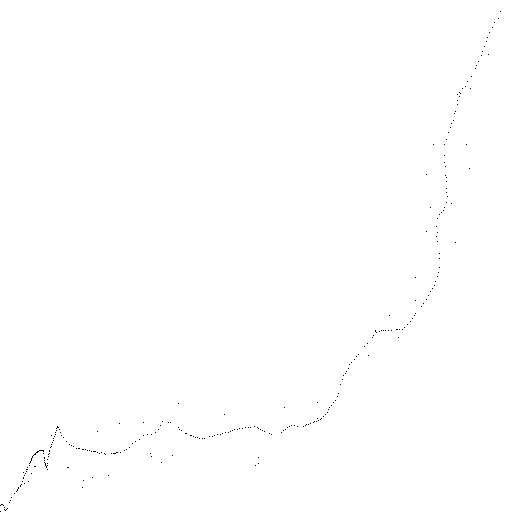

-0.5078618795981953
20160406110058_127_DT6102
20160406110058_127_DT6102_noise.csv
{'lat': [37.36515715363997, 37.34585797, 37.34736588, 37.347404933979576, 37.32918091270979, 37.34773133721368, 37.34836018961642, 37.34839430566439, 37.34837075, 37.34916605, 37.35081650544575, 37.351942290009454, 37.353238627078646, 37.35390675, 37.34028331562978, 37.35760507144896, 37.35937886691822, 37.36041029999999, 37.36166427235128, 37.36306276970801, 37.36367673592448, 37.365041087309216, 37.3664736295641, 37.367974358781545, 37.36948156, 37.37063466862072, 37.371657839593894, 37.37261278657826, 37.374318018813966, 37.37550971, 37.378171700862666, 37.37960399238939, 37.38076344644765, 37.382297990431596, 37.384753195489246, 37.384552584939115, 37.38441219959412, 37.38379840307495, 37.38332100230859, 37.382724306960704, 37.382434392821544, 37.38207169, 37.381837630533646, 37.38173039220037, 37.38117266124711, 37.35857210485102, 37.402229349632684, 37.37984270498442, 37.36439383417855, 37.380183721

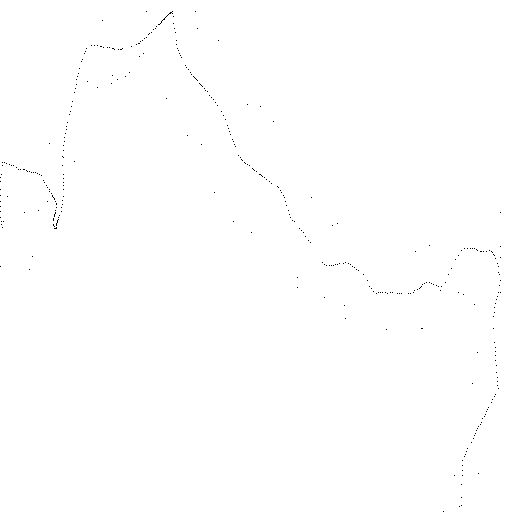

-0.3061174494511434
20160404105046_108_YT9215
20160404105046_108_YT9215_noise.csv
{'lat': [37.47053872, 37.47007403, 37.469394386360676, 37.46922, 37.480071125353504, 37.46681151913125, 37.46630656199545, 37.46568537692842, 37.451385855178735, 37.46403123311402, 37.46345215263457, 37.463009323359344, 37.46244726704077, 37.461876690395826, 37.46131285548439, 37.4605588, 37.458810338311686, 37.458360299999995, 37.4582677, 37.45764983328217, 37.47218315088928, 37.45644720283261, 37.455510357746405, 37.454454263760155, 37.45304043717592, 37.45226085, 37.45206948054886, 37.45251948, 37.4533981548613, 37.45416468699759, 37.45482900849453, 37.455663660472666, 37.457128537342385, 37.44795473241232, 37.46066734, 37.46288556611232, 37.463941541032746, 37.46586610212293, 37.479185800510855, 37.45950961775008, 37.47085610497292, 37.47298484441376, 37.47413997, 37.47702076794659, 37.47817871420733, 37.479728290689934, 37.48114161264838, 37.482486797874365, 37.484223583484685, 37.48580708811907, 37.

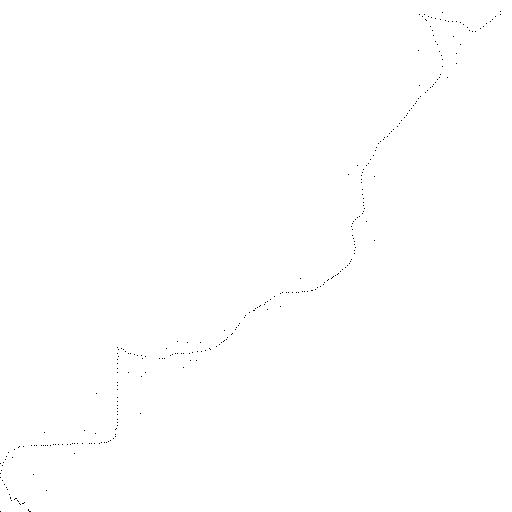

-0.49434937879088636
20160404103542_102_YT6178
20160404103542_102_YT6178_noise.csv
{'lat': [37.4715495854956, 37.4698758807913, 37.468539967598154, 37.4679515788224, 37.466836879627095, 37.4651004226096, 37.46351574648829, 37.462834470173384, 37.4621158893673, 37.461687970041794, 37.461318608101024, 37.473423946086236, 37.45823221063174, 37.456268351495254, 37.45473184027399, 37.4538225, 37.4529444089666, 37.45067264364353, 37.44950575379325, 37.44891804325352, 37.43305077495241, 37.44775964374298, 37.446622355783504, 37.446540915201, 37.42911540855834, 37.44522132327898, 37.429226057297996, 37.45873419473736, 37.4435688133393, 37.443083275131116, 37.44208663420109, 37.441371088936464, 37.44028072109004, 37.4397489228813, 37.43806586248878, 37.43763992062704, 37.45273355938249, 37.436711358965475, 37.436839143364026, 37.43704359794785, 37.42332272945809, 37.43779325997655, 37.43819364457456, 37.43827883251051, 37.4380346526918, 37.43749509984182, 37.45779224878273, 37.43677951067185, 3

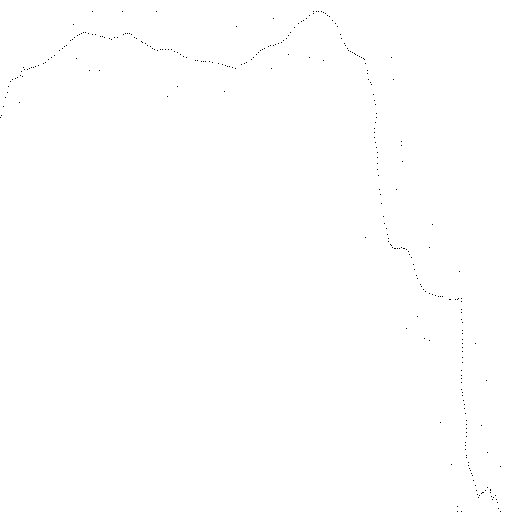

-0.5066684273455877
20160406113815_138_DT3992
20160406113815_138_DT3992_noise.csv
{'lat': [37.3450753, 37.32234099873754, 37.34676851, 37.347370817482044, 37.34696141830259, 37.34662025061449, 37.34682495141337, 37.34750728337914, 37.34818960914407, 37.37115146944976, 37.332681653761384, 37.352215204936975, 37.35364799202858, 37.356240584869056, 37.35733217611745, 37.3587648655384, 37.36002343, 37.38307493196297, 37.3637449540829, 37.365723253698775, 37.36755544, 37.368724712133606, 37.36995254688582, 37.37193068282989, 37.374522644077246, 37.376705278818385, 37.37819033, 37.37922887106199, 37.380115518448356, 37.38120676237959, 37.38263899594129, 37.40615590209193, 37.38415066, 37.38311640104972, 37.38263899594129, 37.38270719685718, 37.3822403, 37.38204588, 37.38165527, 37.38072934511353, 37.38052473678341, 37.38025192480815, 37.38025192480815, 37.38024017, 37.395263007682665, 37.38110089, 37.36480237004126, 37.38304807, 37.37040134026879, 37.385435182627226, 37.38608306466272, 37.38

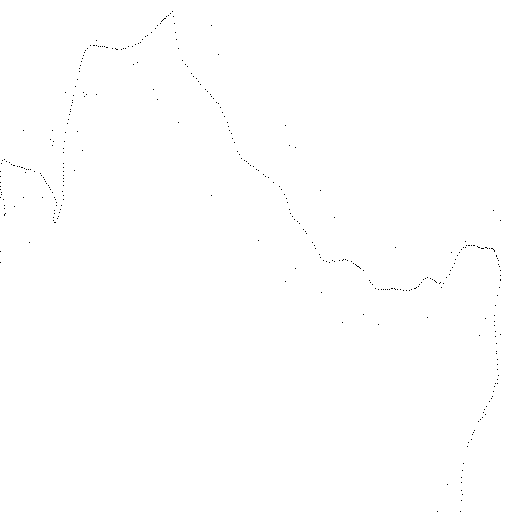

-0.05633463789925486
20160406142308_177_DT6633
20160406142308_177_DT6633_noise.csv
{'lat': [37.443889314252694, 37.44135061, 37.442661430958466, 37.4441762, 37.44545982685414, 37.446618261975615, 37.447640395716256, 37.44653975795303, 37.44959524, 37.45120071919875, 37.45230235, 37.45224452795212, 37.454556467055774, 37.45469273789926, 37.454283924623844, 37.453704768658525, 37.45132337160152, 37.453056689728996, 37.45256282177166, 37.45200134276839, 37.45162658386644, 37.45074078263432, 37.452270761841056, 37.45017927, 37.44960862, 37.44960862, 37.44911762748645, 37.44857510307674, 37.44811738668268, 37.447649316532036, 37.44729968602106, 37.44680565420684, 37.44622644033907, 37.44588572420444, 37.44388548061487, 37.44486356649063, 37.44428060932264, 37.44379028586157, 37.44334734016147, 37.442870318782674, 37.44232514776872, 37.44191626690159, 37.4429744918811, 37.44089405495865, 37.44048516627149, 37.44002049679678, 37.439326636191176, 37.43884958918017, 37.438338464008034, 37.43796

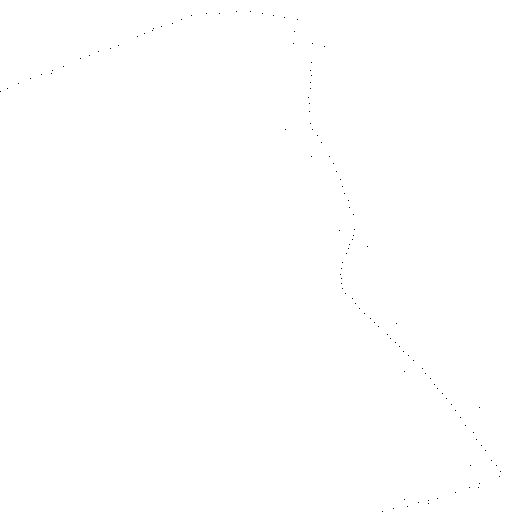

-0.02911640692760642
20160406130407_156_DT3993
20160406130407_156_DT3993_noise.csv
{'lat': [37.43964101, 37.44045109211338, 37.44154145747724, 37.44313397, 37.446039046657035, 37.44787889157962, 37.44896914870114, 37.44839617, 37.44678861856886, 37.4458346166504, 37.44501689103797, 37.444997756302236, 37.442154781012285, 37.44011609446173, 37.43908811306581, 37.43704300268988, 37.43677099171195, 37.43622577626121, 37.436634688221616, 37.435417705364245, 37.43786141069771, 37.43802475, 37.437929561356775, 37.43717990069342, 37.437452505439865, 37.43670283999782, 37.43595316704639, 37.435135333444116, 37.43404487473968, 37.43295440014804, 37.43274993439342, 37.43268177901777, 37.434003244097795, 37.43315886534413, 37.43347701, 37.433227020285344, 37.43315886534413, 37.433499639429726, 37.43315886534413, 37.43329517516453, 37.43233637412131, 37.43336332998165, 37.43380573, 37.43343148473673, 37.43363594862957, 37.43295440014804, 37.43433985570896, 37.432613623580046, 37.43288624495856, 37

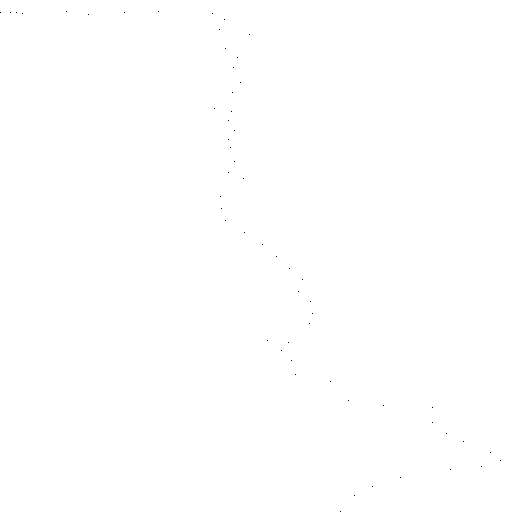

-0.2955965063183328
20160406160655_195_YT6155
20160406160655_195_YT6155_noise.csv
{'lat': [37.65234990628185, 37.638727019570496, 37.636766603564055, 37.634897428529065, 37.633266110074025, 37.640593901644976, 37.62909323980268, 37.62742025819499, 37.62575478600211, 37.62419124753397, 37.63591422465634, 37.621431799293106, 37.6183786748675, 37.62840234249755, 37.614707342191366, 37.61314357137536, 37.611851735898206, 37.61028790503306, 37.609064014461865, 37.60772111135727, 37.60646202981687, 37.604729240046616, 37.603488258115455, 37.58913302939553, 37.60076822530516, 37.59952717729749, 37.5979424877989, 37.59682400108367, 37.595888917268155, 37.59497082354429, 37.59423974081111, 37.605709983354124, 37.59296457932009, 37.59219947193739, 37.6044062145216, 37.590690799406026, 37.590194027027174, 37.58908492556194, 37.58743862703857, 37.58488804914567, 37.582735415152406, 37.579888662964905, 37.588999452266194, 37.575423218283504, 37.572814127981076, 37.559722485576756, 37.56750778567172

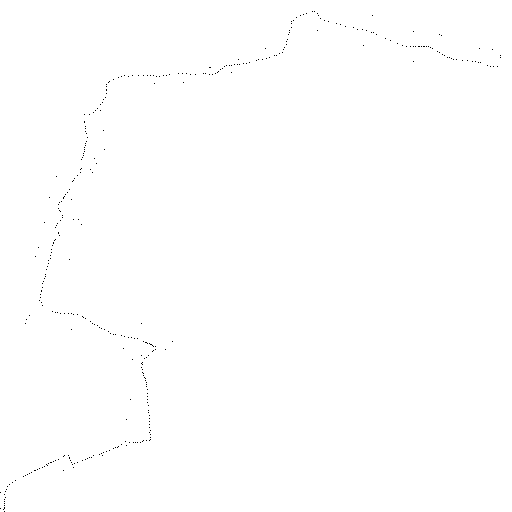

-0.5081457568720751
20160406151417_188_DT6102
20160406151417_188_DT6102_noise.csv
{'lat': [36.884186079954546, 36.88331112815995, 36.882675727485854, 36.88122698, 36.87968926080653, 36.89386540115929, 36.87941463731713, 36.87963798, 36.88041014276761, 36.881129751215724, 36.8844950120064, 36.88690013000001, 36.890398806563695, 36.89369374919092, 36.915542786837264, 36.89880749303532, 36.90213639045954, 36.90488176359686, 36.90753083, 36.91092123678219, 36.913185915959204, 36.91555346320565, 36.94072689417928, 36.92058490080389, 36.92230404, 36.92442009441646, 36.92680979362574, 36.92951706541426, 36.9503876479724, 36.933420095479434, 36.93565749601356, 36.95163684342503, 36.93616434261547, 36.91751481222519, 36.93383943124198, 36.932810318753155, 36.934456892065526, 36.93545167953711, 36.937304007815314, 36.93901908644804, 36.940871328015774, 36.942037531089404, 36.94268922503272, 36.94292932139624, 36.942997920218275, 36.94288877, 36.94274925154691, 36.942840999999994, 36.942895021962

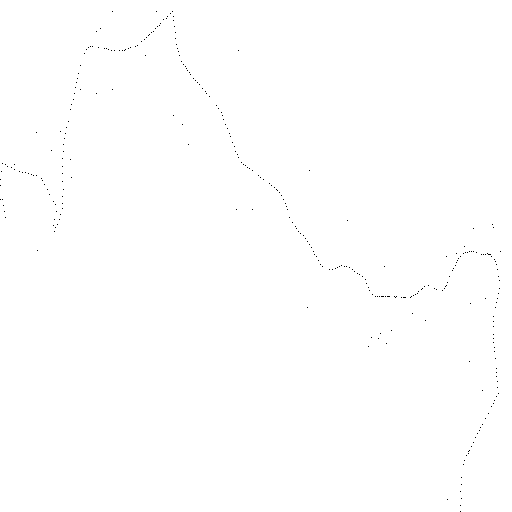

-0.40514682272905134
20160406154818_191_YT4001
20160406154818_191_YT4001_noise.csv
{'lat': [36.999845091144735, 36.998785798114035, 36.99553444223815, 36.99322996239362, 36.97556300337949, 37.00230503300553, 36.98891096683242, 36.988499621130906, 36.98953009, 36.99038493732914, 36.99131043908919, 36.99069696209684, 36.989205353651464, 36.98771120231864, 36.98706968053667, 37.00402122852186, 36.98695439, 36.9855858587292, 36.9847974097172, 36.98353589, 36.9822263235624, 36.98304908058545, 36.983906109689926, 36.98459172602234, 37.00375592340323, 36.98565441912666, 36.98686051775768, 36.98848487, 36.989161561032745, 37.00859307489686, 36.99398404757992, 36.996074881033756, 36.997034588615755, 36.99832724943942, 37.00149021515463, 37.003957834426494, 37.00586265, 37.008961372075035, 37.02734975195275, 37.02758255852513, 37.01792586521161, 37.02063224, 37.02352458971446, 37.02623132724699, 37.02952039747654, 37.03243247619548, 37.03475083, 37.04897935274672, 37.03928398566347, 37.04129715,

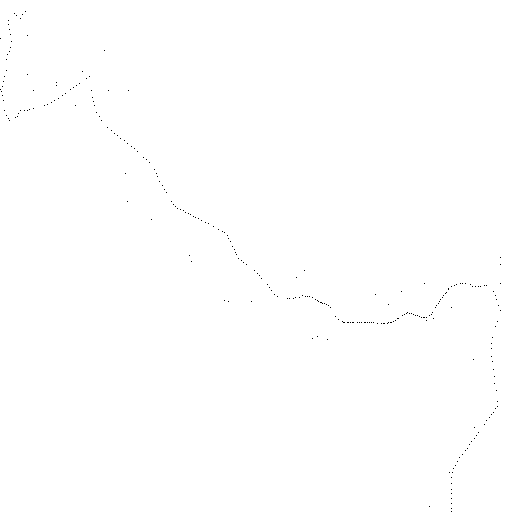

-0.13296854308970296
20160406154311_190_DS4604
20160406154311_190_DS4604_noise.csv
{'lat': [37.321280716910294, 37.322634036184674, 37.323246574201896, 37.324964592452936, 37.32629117, 37.32853614493956, 37.32396503597373, 37.32562605688271, 37.32872268, 37.327785389832464, 37.328706770054076, 37.33017413004346, 37.33177795585507, 37.33715377172554, 37.33515611522801, 37.33680936, 37.339045928741186, 37.34064956513908, 37.34314025164947, 37.345119094370546, 37.34726846789646, 37.35588590708465, 37.352965715871775, 37.358030594967374, 37.3571957280796, 37.358901310723574, 37.355099433422076, 37.363130988424565, 37.35987963001174, 37.363552865432524, 37.36950916443225, 37.3716237341196, 37.37387466216186, 37.37647845388224, 37.379024258638026, 37.38045653388263, 37.38195698337111, 37.38311640104972, 37.38413940176143, 37.385673876660064, 37.38119227548517, 37.38802667717922, 37.382490880453, 37.39095904982707, 37.39239109710796, 37.39354532, 37.39522101485403, 37.40272702153623, 37.39955

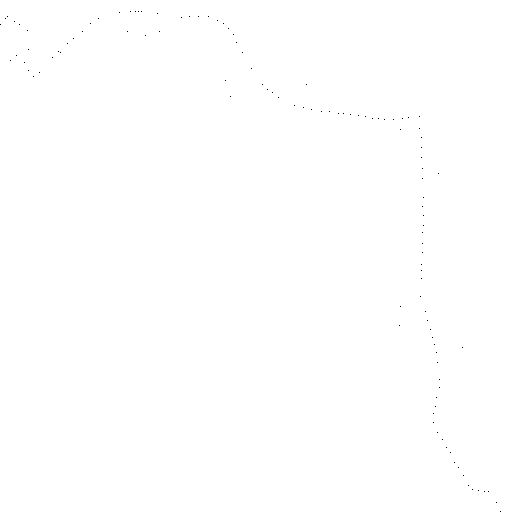

-0.04050277024052207
20160406142411_178_YD3203
20160406142411_178_YD3203_noise.csv
{'lat': [37.4690439937883, 37.469011059828404, 37.46797919698291, 37.4689950005423, 37.4690398585228, 37.4689498426735, 37.4689498426735, 37.468994263121, 37.468994263121, 37.46780764452548, 37.46678578638853, 37.465116721393315, 37.46358387377832, 37.46225538042495, 37.46116531696699, 37.459870845970656, 37.45876371484, 37.458250492526865, 37.45678808928296, 37.45506080772265, 37.45355551038651, 37.45180814058956, 37.450662584343746, 37.44957279647229, 37.44902307287521, 37.4480027229873, 37.44678861856886, 37.44573240143763, 37.4448258482436, 37.443773249536974, 37.444770734194634, 37.441779972782705, 37.440672573863786, 37.439428860155054, 37.44034518139963, 37.437835808752205, 37.436788029630776, 37.436719877932155, 37.43562202974034, 37.437418429900866, 37.43775918459271, 37.438099937732986, 37.43828735129878, 37.438099937732986, 37.43774214689496, 37.43822740319061, 37.43668580205959, 37.4362123922

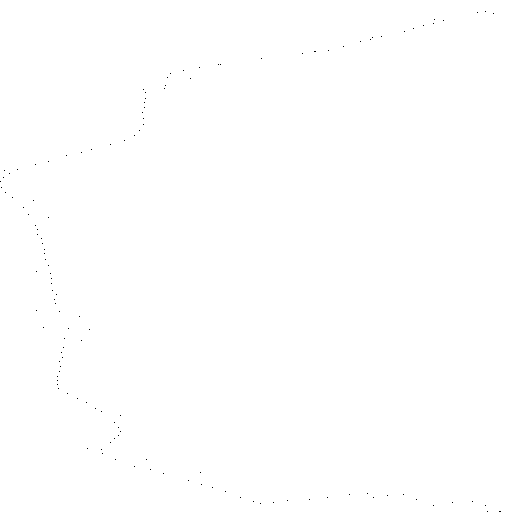

-0.10016887415722664
20160408043347_12_YT9671
20160408043347_12_YT9671_noise.csv
{'lat': [37.44764656, 37.447470041062594, 37.44835551, 37.44712933059157, 37.44617533301779, 37.44802086586598, 37.443449558632715, 37.44195034039252, 37.440246646838844, 37.43924108, 37.43758880744074, 37.43649838448306, 37.43622577626121, 37.436839143364026, 37.437452505439865, 37.43786141069771, 37.43772510919332, 37.43772510919332, 37.43711174935167, 37.43656653638337, 37.43603171, 37.4352716396651, 37.43447094, 37.42923711385792, 37.4325454680803, 37.43274993439342, 37.43274993439342, 37.43302255527546, 37.43649749345587, 37.43309071034082, 37.43309071034082, 37.43309071034082, 37.43363594862957, 37.43377225758118, 37.43386154, 37.43370410313641, 37.43343148473673, 37.43336332998165, 37.42946695538148, 37.43288624495856, 37.43281808970702, 37.43295440014804, 37.432477312518465, 37.4325454680803, 37.43257283, 37.43234100120861, 37.43240915689457, 37.43217614, 37.43200022184803, 37.42770314436517, 37.43

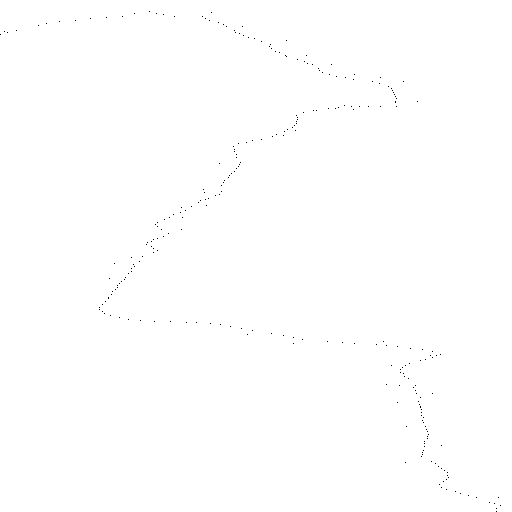

-0.2179884682858031
20160408052452_16_DS1275
20160408052452_16_DS1275_noise.csv
{'lat': [37.47099603577501, 37.47071521745456, 37.47045099407304, 37.45966157436854, 37.46935219432881, 37.46888316230543, 37.46839778841517, 37.46794050641772, 37.476653916629076, 37.46712640731946, 37.46671766201608, 37.46640258598612, 37.466104539870734, 37.45593024795903, 37.46584055517625, 37.465763914283905, 37.46556805386873, 37.465457349928826, 37.465346645825036, 37.473121114394814, 37.465023048274, 37.464844217447535, 37.4733901271618, 37.46450358611853, 37.46434509468582, 37.47241350715617, 37.4630558856566, 37.46241718536499, 37.462102091211406, 37.46169331843893, 37.47149989596476, 37.46084170131875, 37.46023010134599, 37.45981974797159, 37.459385413569706, 37.45889997801754, 37.45844008879817, 37.46588389210253, 37.45743513584664, 37.45687303762862, 37.456345002120756, 37.45583399646663, 37.45526336935985, 37.45462460250857, 37.45402841519197, 37.444943429663525, 37.45299785162322, 37.45237940

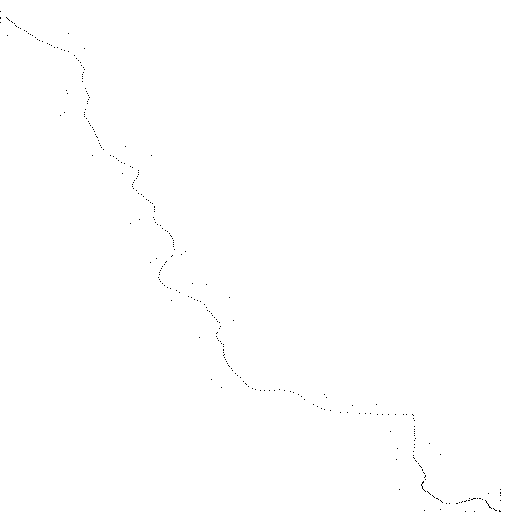

-0.30436463014249426
20160408055631_22_OA8525
20160408055631_22_OA8525_noise.csv
{'lat': [37.43757934, 37.439701456709315, 37.441677752030614, 37.44324512155061, 37.44508409, 37.458429075925764, 37.44917357014249, 37.44808331600024, 37.447061188311174, 37.44652645, 37.435456305142104, 37.44319401219279, 37.44196970976532, 37.4414733101075, 37.43956515855629, 37.438406614232655, 37.43643023252068, 37.43649838448306, 37.43670283999782, 37.43717990069342, 37.43818452, 37.43799771195381, 37.43806586248878, 37.43769103377845, 37.437384354346364, 37.43697544648197, 37.43666876411746, 37.43636208049625, 37.436021319443185, 37.43551017495449, 37.43493087364719, 37.422455617211284, 37.43353371675297, 37.433261097732704, 37.4331282, 37.43312478785021, 37.433261097732704, 37.43302255527546, 37.43309071034082, 37.43315886534413, 37.43329517516453, 37.43315886534413, 37.43332925258087, 37.43346556209101, 37.43339740736696, 37.43346556209101, 37.433555452647575, 37.43339740736696, 37.43377225758118,

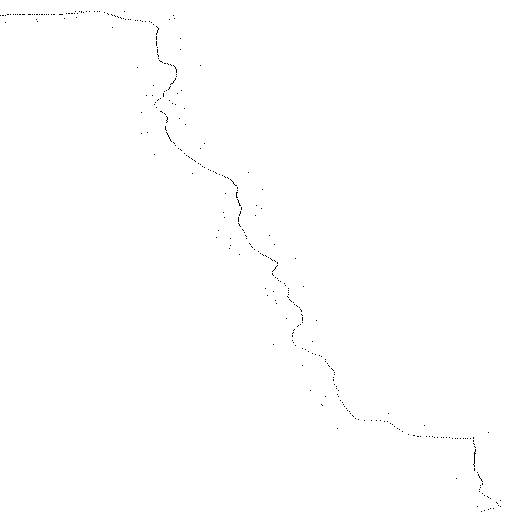

-0.33381262000000334
20160411051843_22_DT6102
20160411051843_22_DT6102_noise.csv
{'lat': [37.43777018, 37.42935350865903, 37.43796981, 37.43932847439467, 37.441450343640156, 37.443425506988724, 37.44467201862122, 37.46137532198475, 37.448364747532615, 37.44944474733056, 37.45087314780254, 37.45237164860965, 37.45400693011304, 37.45617161294364, 37.457960343287475, 37.45762250098046, 37.45707743746945, 37.45643016939033, 37.45588509718915, 37.455101548940135, 37.45434083854713, 37.45324766, 37.45227389351778, 37.45203541166639, 37.4519672738549, 37.45241016852004, 37.45346629136929, 37.453875109113824, 37.454352060324936, 37.45523781879053, 37.45704337086809, 37.45792909745959, 37.459595799999995, 37.46198286605029, 37.4633454279915, 37.46450358611853, 37.46566172630524, 37.467364841047726, 37.469067916990944, 37.47029410764522, 37.47138403800754, 37.47329137789957, 37.48897533961154, 37.47594794878128, 37.47737837091263, 37.47874065224967, 37.479966684219825, 37.48153325135243, 37.4834

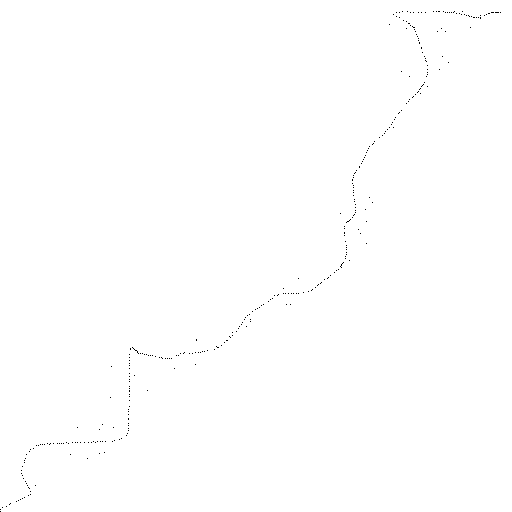

-0.2756827359177265
20160409090244_31_OA3424
20160409090244_31_OA3424_noise.csv
{'lat': [37.727377457906, 37.72660141113032, 37.718355628555294, 37.725786764040656, 37.72425927659565, 37.72243502827043, 37.720287661810524, 37.718386642628104, 37.716713581640605, 37.71431286582703, 37.719590825164325, 37.71105368311011, 37.709241655207, 37.71930177082762, 37.7049672907231, 37.702769281839664, 37.69971332628665, 37.7009709540369, 37.69740429853975, 37.6946860256744, 37.6947135922649, 37.69692890154686, 37.69835508338046, 37.69984914920864, 37.701625888449605, 37.70412744386875, 37.69818238148342, 37.707590644402316, 37.709516434053604, 37.71173269133117, 37.71302278980978, 37.713929967832186, 37.714923946627, 37.715942403427185, 37.716417678476255, 37.725794412865646, 37.71797927502795, 37.71875200290079, 37.71960873198832, 37.720016090628334, 37.72076290898373, 37.72157761132996, 37.712877099811934, 37.72252808607568, 37.722799648048614, 37.72273175764871, 37.72273175764871, 37.72225652

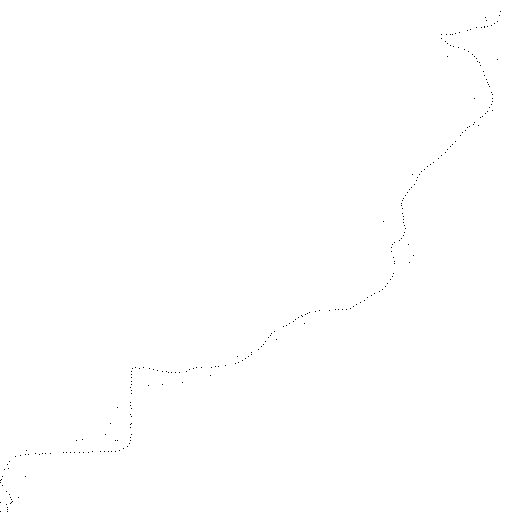

-0.08051242983438556
20160409191219_54_YT6156
20160409191219_54_YT6156_noise.csv
{'lat': [37.46760525182621, 37.46316704656197, 37.464218620226205, 37.46150596350467, 37.46014336804266, 37.45857635256543, 37.458235692681725, 37.46291970742211, 37.45815450383673, 37.4590094248146, 37.464250462644785, 37.46733077913309, 37.468897611142594, 37.4703962892918, 37.4722960464504, 37.475164610774065, 37.476322585795344, 37.4777888907304, 37.47996668421981, 37.48156730679491, 37.482452742851, 37.483917094840066, 37.48877909350191, 37.486212613863465, 37.48306573089703, 37.48214624694208, 37.481124584832074, 37.48010290875256, 37.47935367074921, 37.4781615694741, 37.476867509008734, 37.4758282601295, 37.474279088357456, 37.47318920021063, 37.47240583328836, 37.47138403800754, 37.4703962892918, 37.46903385585231, 37.467490505912274, 37.465389224345905, 37.45994508716934, 37.46208505905715, 37.46079060398309, 37.459462061000416, 37.4581274166676, 37.45564662685196, 37.454454263760155, 37.455305053

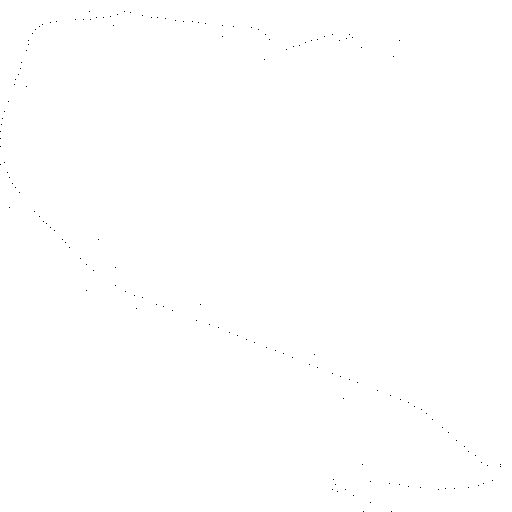

-0.3755381611809412
20160411051629_20_DT6111
20160411051629_20_DT6111_noise.csv
{'lat': [37.34613268, 37.34641554925751, 37.34709788494378, 37.34750728337914, 37.34734114, 37.34716611817136, 37.347499652754884, 37.34839430566439, 37.349486011014, 37.35027154, 37.352351662028696, 37.353579764691965, 37.35630880978718, 37.358628420105155, 37.36115262046509, 37.362926332088826, 37.38041613002047, 37.3668147070221, 37.36824721541422, 37.37043003275146, 37.37199889348381, 37.37438622729707, 37.37643245294913, 37.378205803359755, 37.380320127895004, 37.38325280195101, 37.38562008572699, 37.384957792281945, 37.38444629925339, 37.384173501544794, 37.398148240375626, 37.383662003166144, 37.383355102464144, 37.38311640104972, 37.38277539771101, 37.38246849338029, 37.382263889795325, 37.38166882, 37.38110445893558, 37.38062704101827, 37.38045653388263, 37.380149620061545, 37.38018372165926, 37.38028602635932, 37.37135457602368, 37.38158187381352, 37.382332091052334, 37.38352560300921, 37.38427580

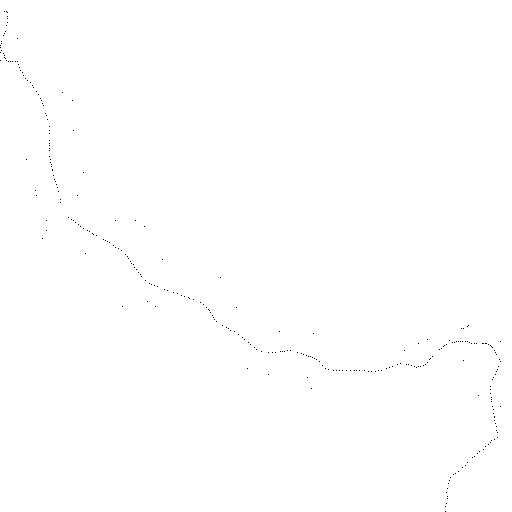

-0.0720549916361648
20160409071216_20_SI5216
20160409071216_20_SI5216_noise.csv
{'lat': [37.469826054213314, 37.46939517972028, 37.46872730490628, 37.46797795285698, 37.467637335805954, 37.4636072560173, 37.46438576953786, 37.465546935501315, 37.464197016595506, 37.46344761913611, 37.46307291758969, 37.46256195790927, 37.46140376970631, 37.460484019235956, 37.45954084, 37.45833193, 37.457792832512936, 37.46061415666719, 37.45690710430756, 37.456259834754206, 37.45565828, 37.454420195963934, 37.453432223123066, 37.45285306056272, 37.452171687103146, 37.45206948054886, 37.45552833101803, 37.449758881682605, 37.453500359600014, 37.453704768658525, 37.45446678, 37.45561255959884, 37.45697523761886, 37.45816756051879, 37.45922360206914, 37.46034775894485, 37.46181254406174, 37.46348168281996, 37.46505829, 37.46753515038801, 37.468931672343324, 37.47066877299985, 37.472882666305814, 37.47482402647086, 37.47673684, 37.48003479651722, 37.47947022966719, 37.484734395098364, 37.48314932186563, 3

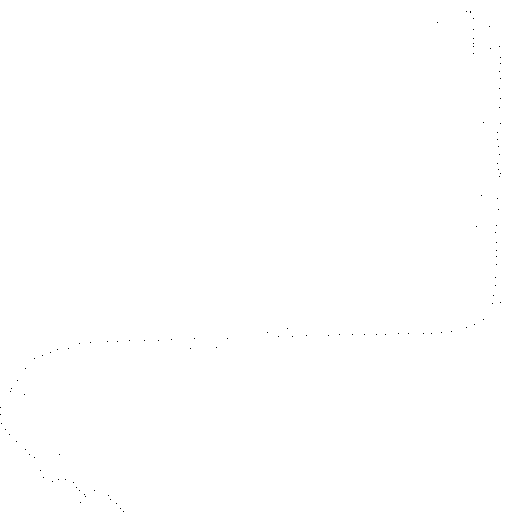

-0.11332415367795079
20160411090343_70_OA9583
20160411090343_70_OA9583_noise.csv
{'lat': [37.447831062742, 37.44665233332532, 37.446039046657035, 37.439376115426725, 37.43879155012108, 37.4422142331637, 37.443803779427576, 37.43895181379568, 37.438134012961655, 37.43697544648197, 37.43649838448306, 37.4366719487161, 37.43758880744074, 37.4382021633725, 37.438406614232655, 37.43748658096335, 37.4371863093331, 37.43666876411746, 37.43625985234324, 37.4356124041315, 37.434896796960075, 37.434283413938815, 37.42927009217553, 37.4331860710424, 37.43302255527546, 37.43312478785021, 37.43336332998165, 37.433227020285344, 37.43332925258087, 37.43343148473673, 37.43346556209101, 37.4334574496205, 37.43353371675297, 37.43346556209101, 37.43353371675297, 37.433601871352906, 37.433670025890756, 37.433567794060686, 37.433781908189204, 37.439223393443974, 37.4336851003485, 37.43346556209101, 37.42981784105252, 37.42967975056575, 37.43312478785021, 37.432881894531896, 37.43283512852571, 37.4326988178

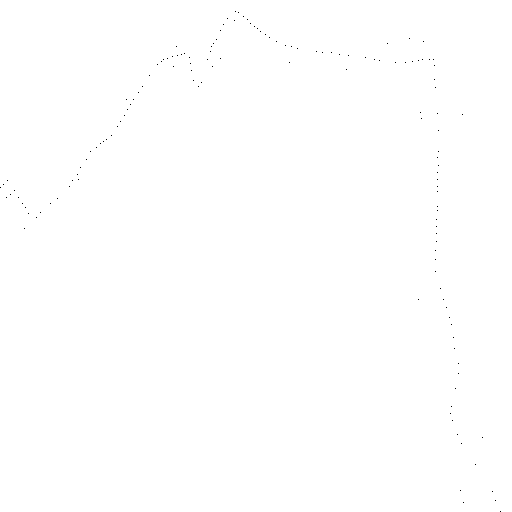

-0.193499136060737
20160411091017_72_YK1902
20160411091017_72_YK1902_noise.csv
{'lat': [37.64126907811882, 37.63649909665296, 37.637529530571385, 37.63972384454411, 37.64040600798449, 37.641771311568434, 37.64714894603352, 37.64227864207237, 37.64243774439958, 37.64258258, 37.64317241944313, 37.64346126284722, 37.643716123741655, 37.644174871148145, 37.64471856810938, 37.645177309324936, 37.645364203082025, 37.636386899651605, 37.643614179488814, 37.642662693049004, 37.64183013241683, 37.640861631777895, 37.63991011008238, 37.63957027795193, 37.644945763336985, 37.63866971528853, 37.63799003812572, 37.63744629191874, 37.63683457267933, 37.636324802799294, 37.64482349742464, 37.63525427466719, 37.63448960227275, 37.63367344677846, 37.63290925438812, 37.63228050448625, 37.631464821010745, 37.63063213489476, 37.635711222010144, 37.62913414, 37.62806604349448, 37.63308637110049, 37.626298617760206, 37.62510898062149, 37.62391932444324, 37.61651481602719, 37.62220231, 37.62062217781951, 37.

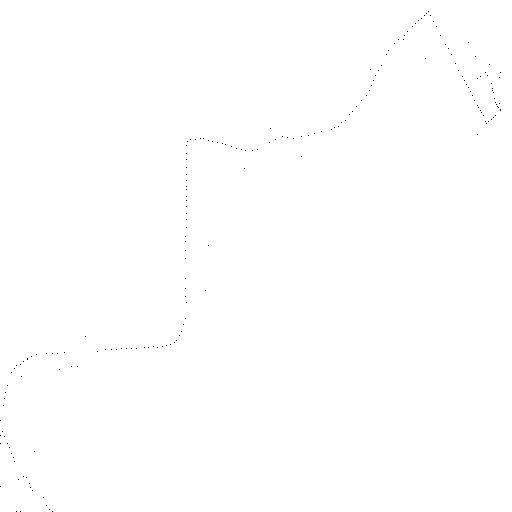

-0.2853213530290546
20160411065934_41_YW8866
20160411065934_41_YW8866_noise.csv
{'lat': [37.44639229999999, 37.448696585910376, 37.44988769, 37.45177525, 37.453364086584024, 37.4522398247284, 37.45125182308689, 37.45190073876122, 37.453738836780616, 37.45448833154089, 37.455510357746405, 37.46538771232756, 37.45706240759322, 37.45588509718915, 37.45493121127803, 37.453670700520895, 37.461495757054266, 37.45206948054886, 37.4519672738549, 37.452307962291634, 37.439976290857814, 37.45319374496485, 37.45348269356902, 37.454283924623844, 37.45465867021168, 37.45496527884147, 37.45547629043124, 37.456327968655216, 37.45714557062557, 37.45799722983981, 37.44522773787827, 37.4601774332318, 37.461029057917365, 37.462119123361774, 37.46323942, 37.457210552726764, 37.46618969602496, 37.467245624278654, 37.468250445380356, 37.46910197811404, 37.47026004706529, 37.47192899722893, 37.47356385105372, 37.48531413126483, 37.47608418064003, 37.4777870579213, 37.492078513444895, 37.48088619499635, 37.48

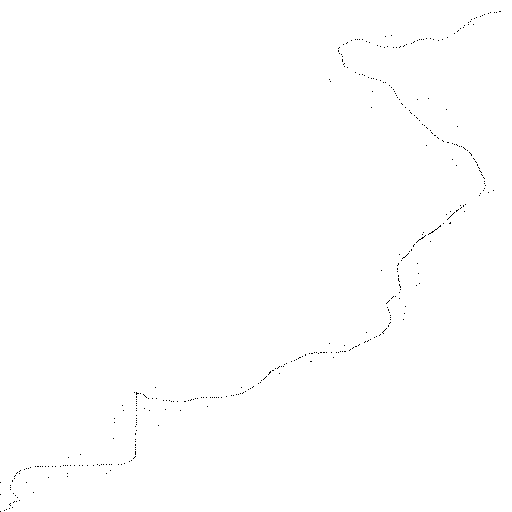

-0.061297278128755295
20160411091232_74_OA3620
20160411091232_74_OA3620_noise.csv
{'lat': [37.3263202216552, 37.32990134569273, 37.330634554953, 37.331239857305256, 37.3286076317615, 37.3281155714994, 37.3295153784672, 37.332426301252056, 37.334030078983226, 37.333942225452425, 37.337032804791896, 37.338704725089826, 37.339933050980285, 37.3439501405472, 37.343787564638994, 37.34400002250447, 37.3492364197395, 37.352146976298144, 37.3550125257385, 37.356854606899695, 37.358560197295496, 37.359788198380755, 37.36135728163819, 37.36415426173101, 37.36717155219587, 37.37063466862072, 37.3737515193395, 37.37636424632677, 37.37813759835005, 37.380592939622154, 37.38456925297913, 37.38379840307495, 37.3852343675794, 37.38666274384385, 37.38761749978396, 37.38714012333367, 37.3863776429778, 37.384275800801845, 37.38318460153137, 37.38199108414694, 37.381309065684, 37.380829762340795, 37.380354229415175, 37.37786668778286, 37.38028602635932, 37.381036256562055, 37.381397984101, 37.381854680950

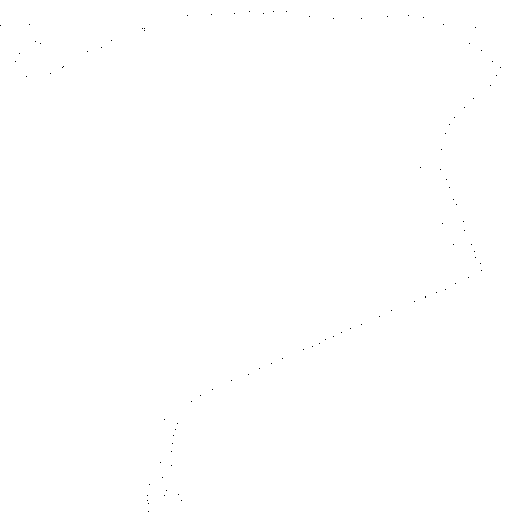

-0.4455476849025004
20160411075156_51_DT6111
20160411075156_51_DT6111_noise.csv
{'lat': [36.9448999, 36.94673646260989, 36.94803976453682, 36.949480230198674, 36.951195034756466, 36.931118159787374, 36.954761704577024, 36.956476390229895, 36.95400723065928, 36.95236107980476, 36.95064630149815, 36.949480230198674, 36.93707695023964, 36.946873653336404, 36.94529594506515, 36.94495296068268, 36.94303221960613, 36.94184369305928, 36.94172883201283, 36.94261226056263, 36.94570752428591, 36.94707943896297, 36.948794297566366, 36.949274451057526, 36.94968600878392, 36.94934304416635, 36.949274451057526, 36.934061702713194, 36.94857665, 36.9501693923647, 36.953527107001975, 36.955447583470956, 36.97778472055365, 36.95860254682214, 36.982520706126415, 36.96127730466724, 36.96278610097588, 36.948387634048814, 36.964123418162885, 36.96467205431605, 36.96525497589678, 36.96600933837571, 36.96720944509565, 36.96792950004632, 36.95383588304645, 36.97019248554982, 36.970878225450186, 36.972146827979

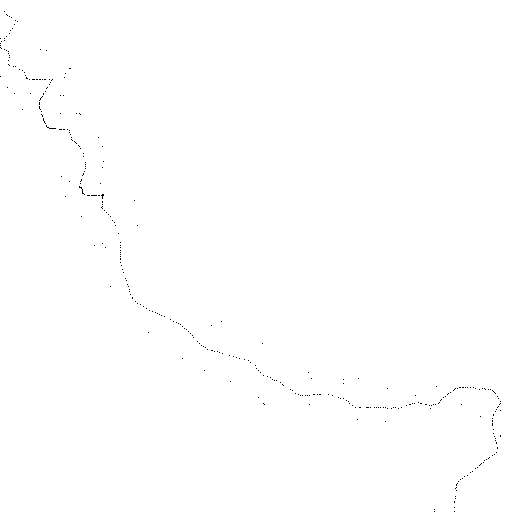

-0.18193078609385083
20160411094454_92_OA7455
20160411094454_92_OA7455_noise.csv
{'lat': [37.6138444633331, 37.61321068877537, 37.61124357292006, 37.61214600704497, 37.612268325535055, 37.61297675978639, 37.60598934933558, 37.61355600790578, 37.6068281974387, 37.60627489463415, 37.61563502802002, 37.61692932398371, 37.6178523050647, 37.61908788907427, 37.6245098826619, 37.6195018153087, 37.618805337969796, 37.61750721369403, 37.616229518983936, 37.61454973079475, 37.61347888901543, 37.612187059363215, 37.6111759523501, 37.61438675498393, 37.607852466963074, 37.606645535490095, 37.605183592267345, 37.6040276168196, 37.6024868660111, 37.60074658865917, 37.59918252430622, 37.59783944280749, 37.5966110023876, 37.59921683690615, 37.59204608844429, 37.58988246278846, 37.589049310977344, 37.587437015714904, 37.579378251434726, 37.583029936891435, 37.58047280252271, 37.57842155623973, 37.57644887795014, 37.57417002937403, 37.572316287265785, 37.570759188886655, 37.567860315978734, 37.565394110

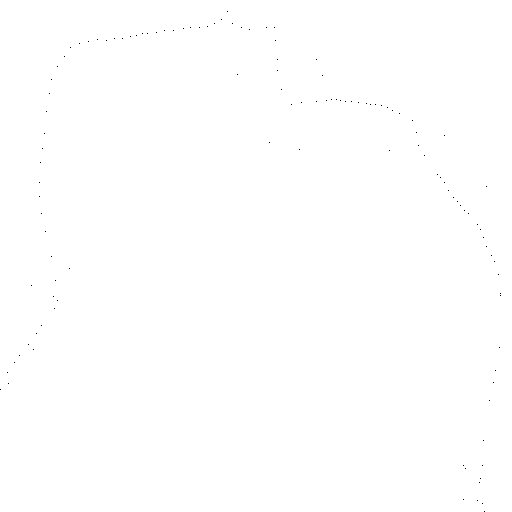

-0.1310999370832775
20160411092618_81_OA4178
20160411092618_81_OA4178_noise.csv
{'lat': [37.224311792887896, 37.228540478600294, 37.223609098963706, 37.223314359184364, 37.222621580359814, 37.22183132308096, 37.221226801844686, 37.22038204320255, 37.21954244264247, 37.22243475136501, 37.21927991967149, 37.22092882719495, 37.22180025625102, 37.223404062912934, 37.22647567240418, 37.22866648351313, 37.230426237015294, 37.231195048730704, 37.2312633871473, 37.22506891771038, 37.231229217686035, 37.23128047148107, 37.231704504212594, 37.23297182743195, 37.2308545498532, 37.235756502117326, 37.23688400985078, 37.23231997112836, 37.23963437255277, 37.2402835123366, 37.2418348654279, 37.243546209212475, 37.2449854804299, 37.2449854804299, 37.246288316320296, 37.2463110317726, 37.246757521609226, 37.24701373744831, 37.247184549608846, 37.24749200468377, 37.247936109340905, 37.248965273262, 37.24962709133138, 37.250019940300994, 37.250330474829, 37.25146709682768, 37.25275274601336, 37.25423400

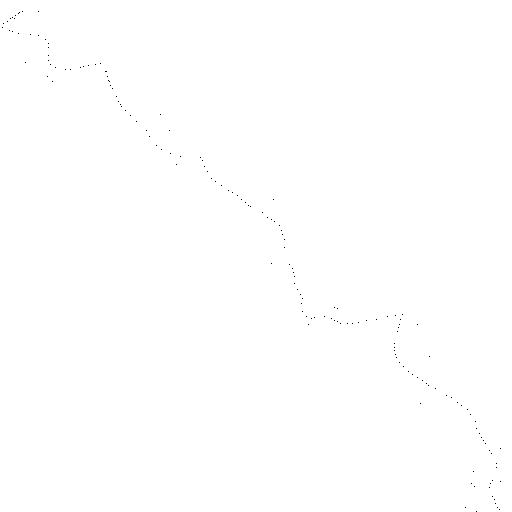

-0.34283853682259746
20160411091953_77_OA9649
20160411091953_77_OA9649_noise.csv
{'lat': [37.34565353, 37.33248337224509, 37.34620314002103, 37.34714940064372, 37.34723435133692, 37.34757551623471, 37.34787479240472, 37.347916679582205, 37.34873546529138, 37.35005145039071, 37.35187406112252, 37.35337508231001, 37.33833665102642, 37.35774151874266, 37.346361156647404, 37.36224414027181, 37.36365616, 37.35089056692327, 37.353860367085396, 37.37002075933841, 37.37193068282989, 37.37384055769547, 37.392410925606804, 37.37731913339567, 37.379160666982706, 37.381138560099075, 37.39217867871392, 37.38407292733177, 37.38460388, 37.384275800801845, 37.38386660293631, 37.383891, 37.383662003166144, 37.38325280195101, 37.38270719685718, 37.38218266, 37.38186969, 37.38129017, 37.381036256562055, 37.380592939622154, 37.38045395, 37.380115518448356, 37.390800914995324, 37.38018372165926, 37.38052473678341, 37.38089985162889, 37.38120676237959, 37.38171827750611, 37.382093386381385, 37.38242295, 37.

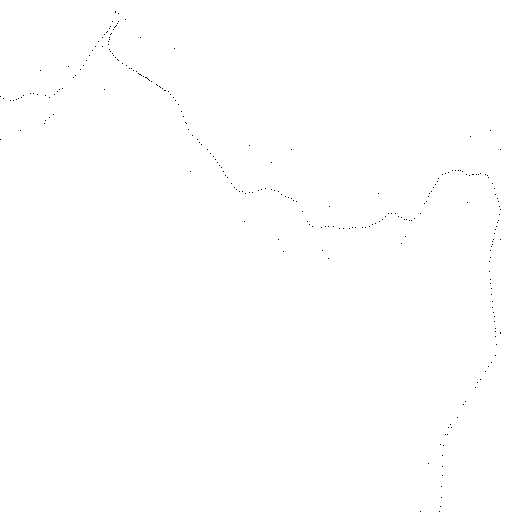

-0.13171505915737924
20160411092801_82_DS6952
20160411092801_82_DS6952_noise.csv
{'lat': [37.5001235, 37.4987575, 37.50131861729519, 37.494315335831644, 37.494999421724, 37.49322573992919, 37.49241162920344, 37.49160834170125, 37.49077409102899, 37.489360951284496, 37.48907150972493, 37.488220204520175, 37.48873408559261, 37.487641311439326, 37.48707944033547, 37.486228112428826, 37.485581096731366, 37.48491704847836, 37.484452675162174, 37.49029132036741, 37.48665241882517, 37.4826864839536, 37.482158630757645, 37.480898579020774, 37.48033201306485, 37.479331998451975, 37.47883817824464, 37.478020813489216, 37.48115621153064, 37.47303245836127, 37.47584113030385, 37.475279170458215, 37.474853440489284, 37.474342561325386, 37.473936953398315, 37.473286733320414, 37.47711560488153, 37.47200950208988, 37.47023837200099, 37.47129734005572, 37.46839907710547, 37.466647557949535, 37.464711835249354, 37.463413148308135, 37.46219499455864, 37.4604236319391, 37.45934902451748, 37.4584377652675

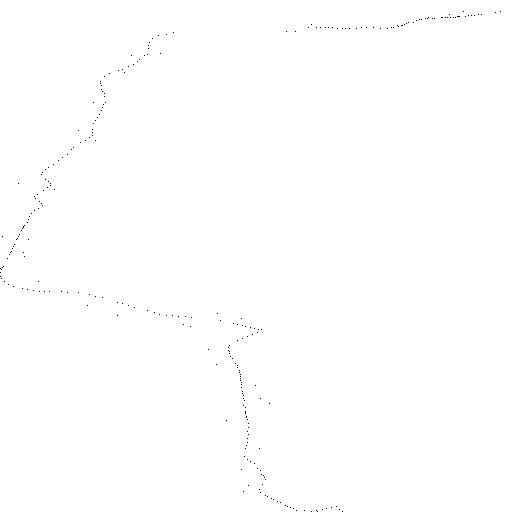

-0.4900223589884405
20160411100020_99_DT6102
20160411100020_99_DT6102_noise.csv
{'lat': [37.83303614, 37.83239351, 37.83238473, 37.83279003, 37.83312441, 37.83477644773826, 37.83645212609755, 37.83549809232664, 37.83592625680034, 37.83624908397471, 37.83678858199251, 37.83498442006278, 37.83274759223191, 37.83053417176526, 37.82821453, 37.825664194600456, 37.8240428345095, 37.822411904356734, 37.82002401796869, 37.817495462353975, 37.81541339513496, 37.81308810445866, 37.810036702551386, 37.806917361372825, 37.805372127765786, 37.80562889938906, 37.80637485380385, 37.80703608954422, 37.80766330277268, 37.832160763642555, 37.8082736128589, 37.80881610647875, 37.80958791, 37.83234541414202, 37.80752507956857, 37.80651893284319, 37.8057729798838, 37.804697021557324, 37.78335077124892, 37.800271369037034, 37.79742290353506, 37.81690293281001, 37.792942662180344, 37.79120934, 37.78833420793018, 37.785803373750454, 37.78342374488313, 37.782364904126894, 37.78167871858121, 37.7796514248322, 3

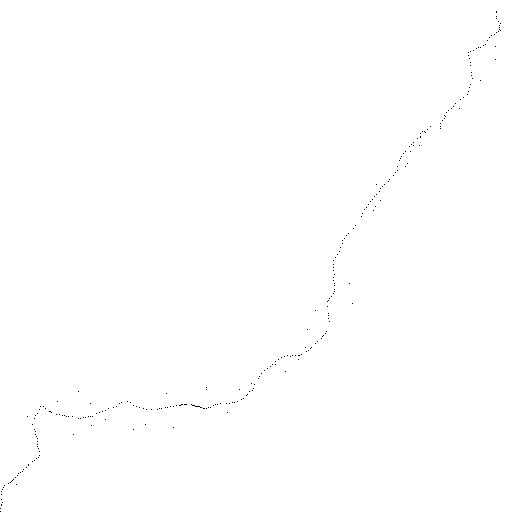

-0.0855464481553625
20160411095251_95_OA3424
20160411095251_95_OA3424_noise.csv
{'lat': [37.301603454161295, 37.306535324867205, 37.302423014999206, 37.3033867735446, 37.30821490297035, 37.304965729390794, 37.305490460784284, 37.30642768465327, 37.3077666235035, 37.30688001945877, 37.31078602002698, 37.31677758955657, 37.318838175581895, 37.3216311512187, 37.323181979819076, 37.32517685387271, 37.32981866627349, 37.3277309900596, 37.328744229429994, 37.3296627115071, 37.3309239063597, 37.33059308956079, 37.32947896061592, 37.328614535286604, 37.327916892158896, 37.328306952947976, 37.33004465521164, 37.33234089506647, 37.33447797307996, 37.33703099817834, 37.33958040362477, 37.342072063674415, 37.34452858521721, 37.347352209991286, 37.35055909379314, 37.35274242566072, 37.355812628664154, 37.358862906606824, 37.36188443814895, 37.36488605014251, 37.367478254784736, 37.37095712552307, 37.37424873494323, 37.38038498206577, 37.37961949474407, 37.38146097184684, 37.3831819505914, 37.384734

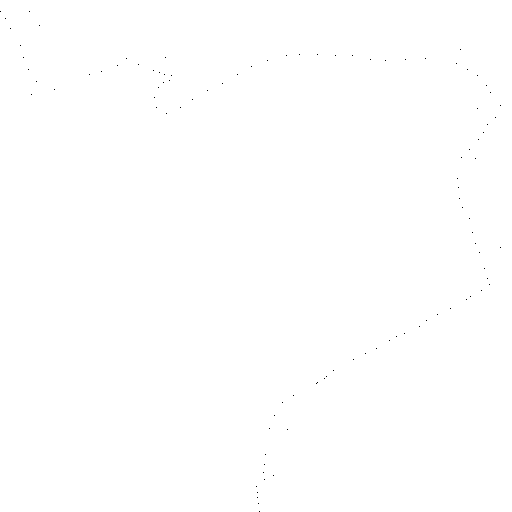

In [29]:
os.chdir("/content/drive/My Drive/WayPoint/직접찍은데이터/")
#os.chdir("/content/drive/My Drive/WayPoint/201607/")

files = glob.glob("*csv")

for myFile in files:
  csv_file = pd.read_csv(myFile, names=["lat","long","num"], header=None)
  
  minX, minY, maxX, maxY = coorMaxMin(csv_file)
  print(minX-maxX)
  resultImage = map2Image_noise(minX,minY,maxX,maxY,csv_file,myFile[:-4])

  cv2_imshow(resultImage)




512


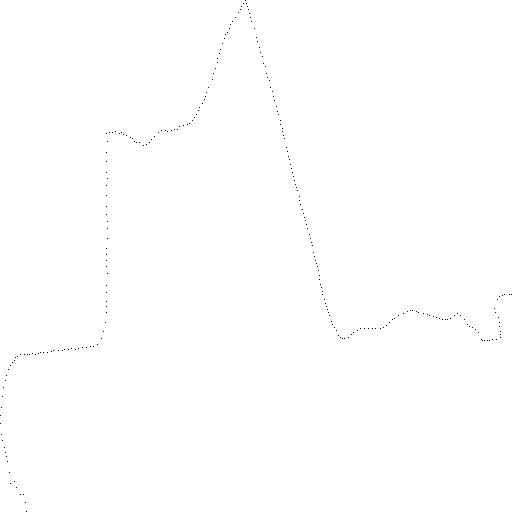

In [ ]:
resultImage = map2Image(minX,minY,maxX,maxY,csv_file)

cv2_imshow(resultImage)
